In [1]:
# [1] Import thư viện
import pandas as pd
import numpy as np

In [ ]:
# [2] Load data
Book = pd.read_csv('book_data.csv')
ID = pd.read_csv('book_id.csv')
Com = pd.read_csv('comments.csv', encoding='latin1' ,engine="python",sep=',',quotechar='"',error_bad_lines=False) # Do file này nhiều bình luận và kiểu chữ khác nhau nên cần phải sửa lại những dòng python đọc không được, cũng như là đổi lại dấu

<ipython-input-3-803b923cea7d>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Com = pd.read_csv('comments.csv', encoding='latin1' ,engine="python",sep=',',quotechar='"',error_bad_lines=False) # Do file này nhiều bình luận và kiểu chữ khác nhau nên cần phải sửa lại những dòng python đọc không được, cũng như là đổi lại dấu


In [ ]:
Book.head() # Data chính để phân tích , nhìn sơ thấy title bị trùng

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
1,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...


In [ ]:
ID.head()

,id
0,74021317
1,74021317
2,184466860
3,73787185
4,52789367


In [ ]:
Com.head() # Đã thử nhiều mã encode để đọc content nhưng không chạy được nên sheet này chỉ tập trung vô rating

,product_id,comment_id,title,thank_count,customer_id,rating,content
0,74021317,12559756,Cá»±c kÃ¬ hÃ i lÃ²ng,313,22051463,5,"CÃ³ nhá»¯ng ngÆ°á»i bÆ°á»c Äáº¿n, há» láº¥..."
1,74021317,16979365,Cá»±c kÃ¬ hÃ i lÃ²ng,6,27791831,5,Tháº¥y nhiá»u báº¡n chÃª tiki gÃ³i hÃ ng quÃ¡...
2,74021317,14069617,Cá»±c kÃ¬ hÃ i lÃ²ng,25,17748750,5,"BÃ¬a cá»±c xinh, tiki giao hÃ ng nhanh, sÃ¡ch ..."
3,74021317,8569824,Cá»±c kÃ¬ hÃ i lÃ²ng,57,410797,5,"SÃ¡ch lÃºc nháº­n hÃ¬nh thá»©c ráº¥t á»n, khÃ..."
4,74021317,18368714,Cá»±c kÃ¬ hÃ i lÃ²ng,0,28545286,5,Má»t cuá»n sÃ¡ch ráº¥t ÄÃ¡ng Äá»c vá» tÃ...


In [ ]:
Book.info() # Xử lý tác giả, số trang sách, nhà xuất bản, số lượng, thể loại

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1796 non-null   int64  
 1   title           1796 non-null   object 
 2   authors         1653 non-null   object 
 3   original_price  1796 non-null   int64  
 4   current_price   1796 non-null   int64  
 5   quantity        1751 non-null   float64
 6   category        1796 non-null   object 
 7   n_review        1796 non-null   int64  
 8   avg_rating      1796 non-null   float64
 9   pages           1546 non-null   object 
 10  manufacturer    1523 non-null   object 
 11  cover_link      1796 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 168.5+ KB


In [ ]:
ID.info() # Có 1796 sách nhưng tới 2024 ID => Nên xóa những ID không cần thiết để data chính xác hơn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      2024 non-null   int64
dtypes: int64(1)
memory usage: 15.9 KB


In [ ]:
Com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270956 entries, 0 to 270955
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   product_id   270956 non-null  object
 1   comment_id   270933 non-null  object
 2   title        270921 non-null  object
 3   thank_count  270927 non-null  object
 4   customer_id  270927 non-null  object
 5   rating       270925 non-null  object
 6   content      196137 non-null  object
dtypes: object(7)
memory usage: 14.5+ MB


In [ ]:
# [3] Cleaning Data
Book.isnull().sum()

product_id          0
title               0
authors           143
original_price      0
current_price       0
quantity           45
category            0
n_review            0
avg_rating          0
pages             250
manufacturer      273
cover_link          0
dtype: int64

In [ ]:
# Tính số tillte trùng
from collections import Counter
counts = Counter(Book['title'])
duplicates = [o for o, c in counts.items() if c > 1]
counts

Counter({'Cây Cam Ngọt Của Tôi': 2,
         'Hành Tinh Của Một Kẻ Nghĩ Nhiều': 1,
         'Những Tù Nhân Của Địa Lý': 2,
         'Nhà Giả Kim (Tái Bản 2020)': 2,
         'Một Thoáng Ta Rực Rỡ Ở Nhân Gian': 2,
         'Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMIYA (Tái Bản)': 2,
         'Thao Túng Tâm Lý': 1,
         'Thư Viện Nửa Đêm': 1,
         'Không Phải Sói Nhưng Cũng Đừng Là Cừu -Tặng kèm bookmark 2 mặt': 1,
         'Càng Bình Tĩnh Càng Hạnh Phúc': 1,
         'Yêu Những Điều Không Hoàn Hảo': 1,
         'Hiểu Về Trái Tim (Tái Bản)': 1,
         'Quyền Lực Của Địa Lý - The Power Of Geography': 2,
         'Chiến Binh Cầu Vồng (Tái Bản 2020)': 1,
         'Thiên Tài Bên Trái, Kẻ Điên Bên Phải (Tái Bản)': 1,
         'How Psychology Works - Hiểu Hết Về Tâm Lý Học': 1,
         'Đại Dương Đen - Những Câu Chuyện Từ Thế Giới Của Trầm Cảm': 2,
         'Cú Săn Đêm': 2,
         'Vị Thần Của Những Quyết Định': 1,
         'Hoàng Tử Bé (Tái Bản 2019)': 1,
         'Muôn Kiếp Nhân Sinh (K

In [ ]:
# Xóa những tittle bị trùng
Book = Book.drop_duplicates(subset=['title'])

In [ ]:
# Check lại đã xóa giá trị trùng title chưa => đã xóa
counts = Counter(Book['title'])
duplicates = [o for o, c in counts.items() if c > 1]
counts

Counter({'Cây Cam Ngọt Của Tôi': 1,
         'Hành Tinh Của Một Kẻ Nghĩ Nhiều': 1,
         'Những Tù Nhân Của Địa Lý': 1,
         'Nhà Giả Kim (Tái Bản 2020)': 1,
         'Một Thoáng Ta Rực Rỡ Ở Nhân Gian': 1,
         'Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMIYA (Tái Bản)': 1,
         'Thao Túng Tâm Lý': 1,
         'Thư Viện Nửa Đêm': 1,
         'Không Phải Sói Nhưng Cũng Đừng Là Cừu -Tặng kèm bookmark 2 mặt': 1,
         'Càng Bình Tĩnh Càng Hạnh Phúc': 1,
         'Yêu Những Điều Không Hoàn Hảo': 1,
         'Hiểu Về Trái Tim (Tái Bản)': 1,
         'Quyền Lực Của Địa Lý - The Power Of Geography': 1,
         'Chiến Binh Cầu Vồng (Tái Bản 2020)': 1,
         'Thiên Tài Bên Trái, Kẻ Điên Bên Phải (Tái Bản)': 1,
         'How Psychology Works - Hiểu Hết Về Tâm Lý Học': 1,
         'Đại Dương Đen - Những Câu Chuyện Từ Thế Giới Của Trầm Cảm': 1,
         'Cú Săn Đêm': 1,
         'Vị Thần Của Những Quyết Định': 1,
         'Hoàng Tử Bé (Tái Bản 2019)': 1,
         'Muôn Kiếp Nhân Sinh (K

In [ ]:
# Xử lý cột tác giả
Book.authors.value_counts()

Nguyễn Nhật Ánh    24
Higashino Keigo    20
.                  18
Thích Nhất Hạnh    16
Haruki Murakami    15
                   ..
Urako Kanamori      1
Cổ Viên             1
Robert Winston      1
Yongchul Kwon       1
John C. Maxwell     1
Name: authors, Length: 1083, dtype: int64

In [ ]:
# Thay thế giá trị "." thành "unknown"
Book.loc[Book.authors == '.' , 'authors'] = "Unknown"
Book.authors = Book.authors.fillna("Unknown") # Điền những chỗ chưa điền tác giả thành unknown
Book.authors.value_counts()

Unknown            156
Nguyễn Nhật Ánh     24
Higashino Keigo     20
Thích Nhất Hạnh     16
Haruki Murakami     15
                  ... 
Urako Kanamori       1
Cổ Viên              1
Robert Winston       1
Yongchul Kwon        1
John C. Maxwell      1
Name: authors, Length: 1083, dtype: int64

In [ ]:
# Số lượng điền giá trị trung bình vào các cột null
Book.quantity = Book.quantity.fillna(np.mean(Book.quantity))

In [ ]:
# Check thể loại đã ổn chưa
Book.category.value_counts() # có mấy chỗ tên sách chứ không phải thể loại

Sách tư duy - Kỹ năng sống                 292
Tiểu Thuyết                                133
Truyện ngắn - Tản văn - Tạp Văn            109
Sách nghệ thuật sống đẹp                    58
Sách kỹ năng làm việc                       55
                                          ... 
Shaman King - Tập 19                         1
Blue Period - Tập 07                         1
Komi - Nữ Thần Sợ Giao Tiếp - Tập 14         1
Bên Rặng Tuyết Sơn (Tái Bản)                 1
Kaguya-Sama: Cuộc Chiến Tỏ Tình - Tập 3      1
Name: category, Length: 354, dtype: int64

In [ ]:
counts1 = Counter(Book['category'])
duplicates = [o for o, c in counts1.items() if c > 1]
counts1 #Loại những giá trị khác 1 => Lọc list thể loại

Counter({'Tiểu Thuyết': 133,
         'Sách tư duy - Kỹ năng sống': 292,
         'Lĩnh vực khác': 31,
         'Tác phẩm kinh điển': 38,
         'Truyện ngắn - Tản văn - Tạp Văn': 109,
         'Truyện Giả tưởng - Huyền Bí - Phiêu Lưu': 37,
         'Sách kinh tế học': 13,
         'Sách Chiêm Tinh - Horoscope': 14,
         'Truyện kể cho bé': 18,
         'Muôn Kiếp Nhân Sinh (Khổ Nhỏ)': 1,
         'Truyện dài': 23,
         'Sách tài chính, tiền tệ': 40,
         'Du ký': 7,
         'Truyện trinh thám': 52,
         'Bài học kinh doanh': 53,
         'Sách nghệ thuật sống đẹp': 58,
         'Combo 2 Cuốn: Muôn Kiếp Nhân Sinh + Muôn Kiếp Nhân Sinh 2 (Bìa Mềm)': 1,
         'GIẬN (TBL22)': 1,
         'Kiến Thức Bách Khoa': 23,
         'Sách Học Tiếng Anh': 42,
         'Sách kỹ năng làm việc': 55,
         'Sách quản trị, lãnh đạo': 18,
         'Monster #8 - Tập 6': 1,
         'Blue Flag Tập 8 [Tặng Kèm Bookmark PVC]': 1,
         'Lịch Sử Thế Giới': 14,
         'Lược Sử Tôn 

In [ ]:
# Lọc thể loại
keeping_values = list(pd.DataFrame(Book.category.value_counts().loc[lambda x : x>1]).T.columns)
keeping_values

['Sách tư duy - Kỹ năng sống',
 'Tiểu Thuyết',
 'Truyện ngắn - Tản văn - Tạp Văn',
 'Sách nghệ thuật sống đẹp',
 'Sách kỹ năng làm việc',
 'Bài học kinh doanh',
 'Truyện trinh thám',
 'Sách Học Tiếng Anh',
 'Sách Marketing - Bán hàng ',
 'Sách tài chính, tiền tệ',
 'Tác phẩm kinh điển',
 'Truyện Giả tưởng - Huyền Bí - Phiêu Lưu',
 'Kiến thức - Bách khoa',
 'Sách Làm Cha Mẹ',
 'Lĩnh vực khác',
 'Truyện dài',
 'Kiến Thức Bách Khoa',
 'Văn học thiếu nhi',
 'Light novel',
 'Truyện kể cho bé',
 'Sách quản trị, lãnh đạo',
 'Truyện đam mỹ',
 'Tiểu sử - Hồi ký',
 'Lịch Sử Thế Giới',
 'Sách Chiêm Tinh - Horoscope',
 'Sách Học Tiếng Hoa',
 'Truyện tranh Ehon',
 'Sách kinh tế học',
 'Sách giáo dục',
 'Tô màu - Luyện chữ  ',
 'Thơ',
 'Sách khởi nghiệp',
 'Truyện tranh thiếu nhi',
 'Sách Nấu ăn',
 'Sách Luyện Thi Đại Học - Cao Đẳng',
 'Triết Học',
 'Sách Tâm Lý Tuổi Teen',
 'Lịch Sử Việt Nam',
 'Du ký',
 'Sách doanh nhân',
 'Truyện kinh dị',
 'Tranh Truyện',
 'Truyện ngôn tình',
 'Mỹ Thuật - Kiến T

In [ ]:
def handle_category(category):
    if category not in keeping_values:
        return "Others"
    return category
Book.category = Book.category.apply(lambda category: handle_category(category))

In [ ]:
# trang là kiểu số, với check dữ liệu có chữ cuốn, xử lý lại
# Tính giá trị trung bình
def handle_pages(lst_pages):
    lst_int = []
    for page in lst_pages:
        try:
            lst_int.append(int(page))
        except:
            continue

    return np.mean(lst_int)

mean_pages = handle_pages(list(Book.pages))

In [ ]:
Book.pages = Book.pages.fillna(str(mean_pages))

In [ ]:
Book = Book.query('pages != "Cuốn"')

In [ ]:
Book.pages = Book.pages.apply(lambda page: round(float(page)))
Book.pages = Book.pages.astype("int64")

In [ ]:
# Nhà sản xuất
Book.manufacturer.value_counts()

Nhà Xuất Bản Thế Giới                            247
NXB Trẻ                                          143
Nhà Xuất Bản Hà Nội                              128
Nhà Xuất Bản Dân Trí                             126
Nhà Xuất Bản Kim Đồng                            113
Nhà Xuất Bản Hội Nhà Văn                         111
Nhà Xuất Bản Thanh Niên                           97
Nhà Xuất Bản Tổng hợp TP.HCM                      91
Nhà Xuất Bản Lao Động                             89
Nhà Xuất Bản Văn Học                              77
Nhà Xuất Bản Hồng Đức                             56
Nhà Xuất Bản Công Thương                          46
Nhà Xuất Bản Phụ Nữ Việt Nam                      38
Nhà Xuất Bản Phụ Nữ                               30
Nhà Xuất Bản Đà Nẵng                              16
Nhà Xuất Bản Đại Học Quốc Gia Hà Nội              13
Nhà Xuất Bản Mỹ Thuật                              8
Nhà Xuất Bản Tri Thức                              7
Nhà Xuất Bản Lao Động Xã Hội                  

In [ ]:
def handle_manufactuner(manufactuner):
    if manufactuner == "hong duc":
        return "Nhà Xuất Bản Hồng Đức"
    elif manufactuner == "NXB Dân Trí":
        return "Nhà Xuất Bản Dân Trí"
    elif manufactuner == "ĐHQG Hà Nội":
        return "Nhà Xuất Bản Đại Học Quốc Gia Hà Nội"
    else:
        return manufactuner

Book.manufacturer = Book.manufacturer.apply(lambda manufacturer: handle_manufactuner(manufacturer))

In [ ]:
Book.manufacturer = Book.manufacturer.fillna("Unknown")

In [ ]:
Book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1768 entries, 0 to 1795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1768 non-null   int64  
 1   title           1768 non-null   object 
 2   authors         1768 non-null   object 
 3   original_price  1768 non-null   int64  
 4   current_price   1768 non-null   int64  
 5   quantity        1768 non-null   float64
 6   category        1768 non-null   object 
 7   n_review        1768 non-null   int64  
 8   avg_rating      1768 non-null   float64
 9   pages           1768 non-null   int64  
 10  manufacturer    1768 non-null   object 
 11  cover_link      1768 non-null   object 
 12  discount        1768 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 193.4+ KB


In [ ]:
# Tính thêm một cột discount
Book['discount'] = round(1 - Book['current_price']/Book['original_price'],2)
Book.discount = Book.discount.fillna(np.mean(Book.discount))

In [ ]:
Book.to_csv('book_data_clean.csv')

In [ ]:
Com.to_csv('comments_clean.csv')

In [88]:
Book = pd.read_csv('book_data_clean.csv')
Book.drop('product_id',axis=1, inplace=True)
Book.drop(Book.columns[[0]],axis=1, inplace=True)

In [ ]:
# [4] Exploratory Data Analysis (EDA)
# Dự đoán xu hướng giá tiền bỏ ra cho từng phân khúc sách
# Dự đoán phân khúc tiềm năng để đầu tư
# Dự đoán black list
# Dự đoán best seller
# Phân khúc giảm giá có xu thành công
# Đánh giá giá trị cuốn sách
# Thời gian ra lâu thì càng giảm giá hả?
# Mức độ thu hút độc giả dựa trên đấu
# So sánh giá => rẻ thì mua
# Tác giả nào , thể loại nào => top best seller tiềm năng
# Bình luận thấp => tìm nguyên nhân để cải thiện

In [ ]:
Book.head()

,Unnamed: 0,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,discount
0,0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.4
1,2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...,0.3
2,3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...,0.4
3,4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...,0.4
4,5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Unknown,135000,81000,10000.0,Tiểu Thuyết,1636,4.8,304,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/2f/b5/4e/a...,0.4


<ipython-input-89-bf33820973c5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Book.corr(), annot=True, cmap='coolwarm') # Hệ số tương quan của các chỉ số này không cao


<Axes: >

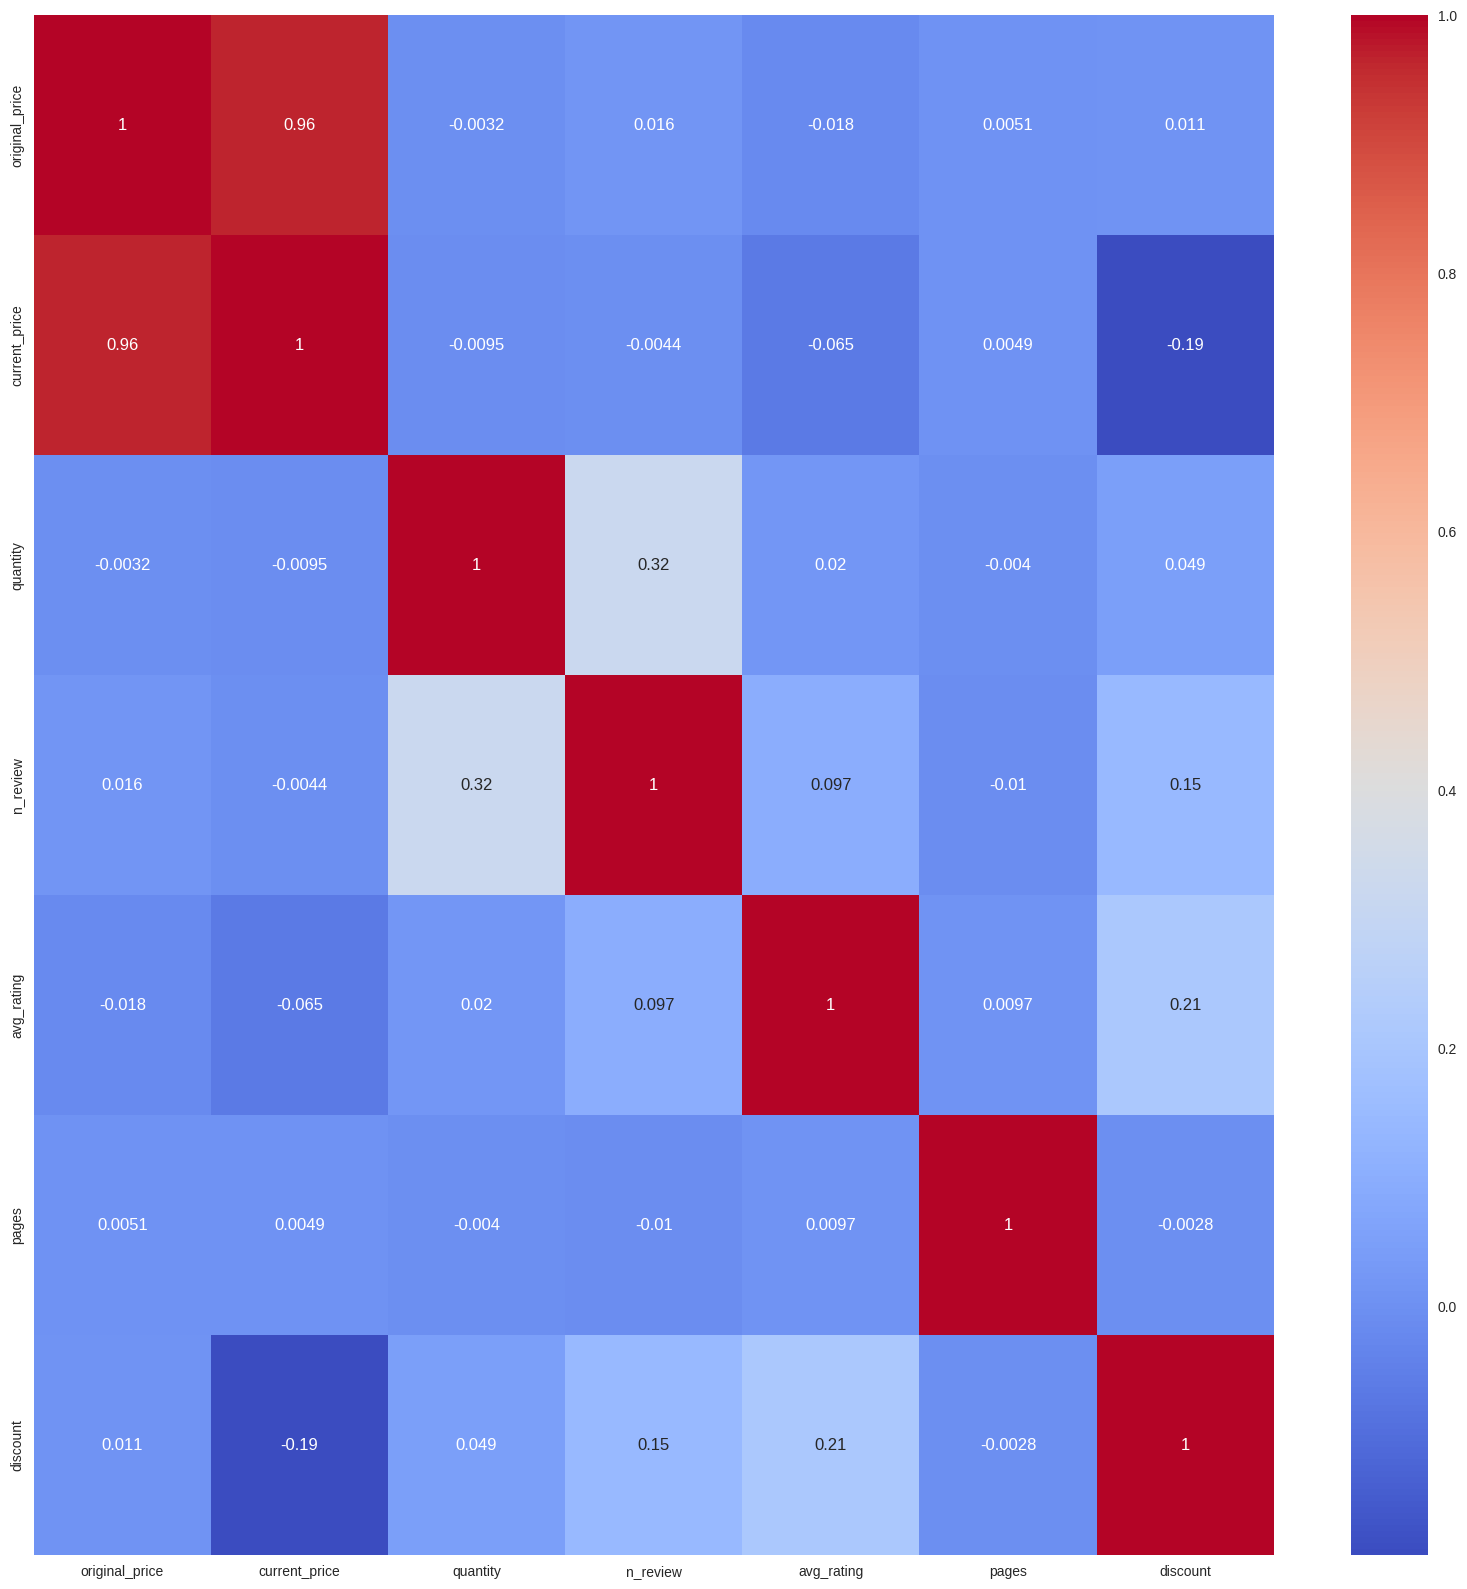

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(Book.corr(), annot=True, cmap='coolwarm') # Hệ số tương quan của các chỉ số này không cao

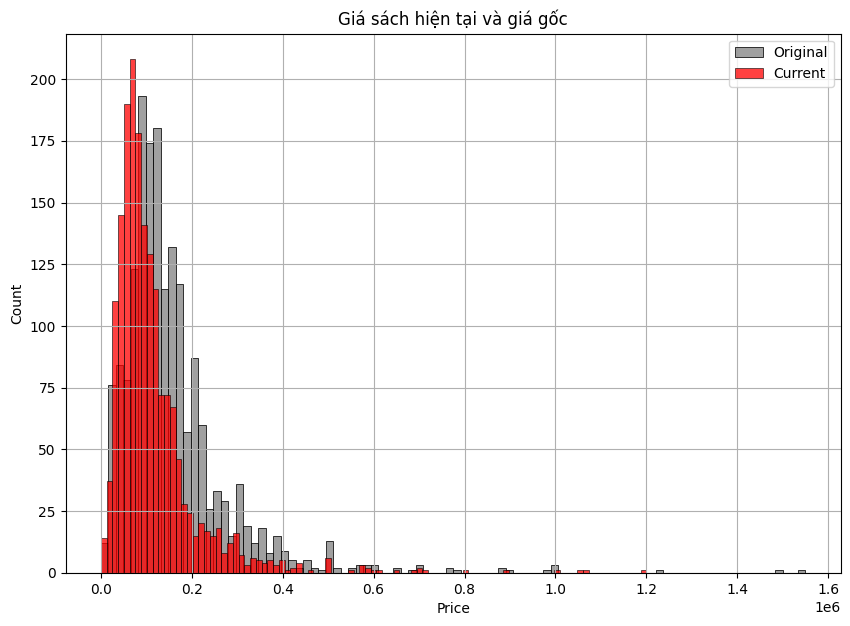

In [ ]:
# Giá sách: Sao chuyển về dạng tiền việt nam như trên số liệu?
fig = plt.subplots(figsize=(10, 7))
ax = sns.histplot(Book.original_price, color='gray',label='Original')
ax = sns.histplot(Book.current_price, color='red', label='Current')
plt.xlabel('Price')
plt.title('Giá sách hiện tại và giá gốc')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Giá cho từng thể loại vì dựa trên độ tương quan nhận thấy giá sách với sản lượng mua không tương quan nhau nên không xem xét giá với sản lượng mà chuyển sang xem xét giá giảm với sản lượng

In [ ]:
# Giá giảm cho từng thể loại:
Book.groupby('category').discount.mean()

category
Bài học kinh doanh               0.263962
Chăm sóc sức khỏe                0.173333
Du ký                            0.195714
Giáo Trình Đại Học - Cao Đẳng    0.016667
Kiến Thức Bách Khoa              0.311739
                                   ...   
Truyện đam mỹ                    0.267222
Tác phẩm kinh điển               0.350000
Tô màu - Luyện chữ               0.380833
Văn học thiếu nhi                0.282857
Đạo đức - Kỹ năng sống           0.253333
Name: discount, Length: 70, dtype: float64

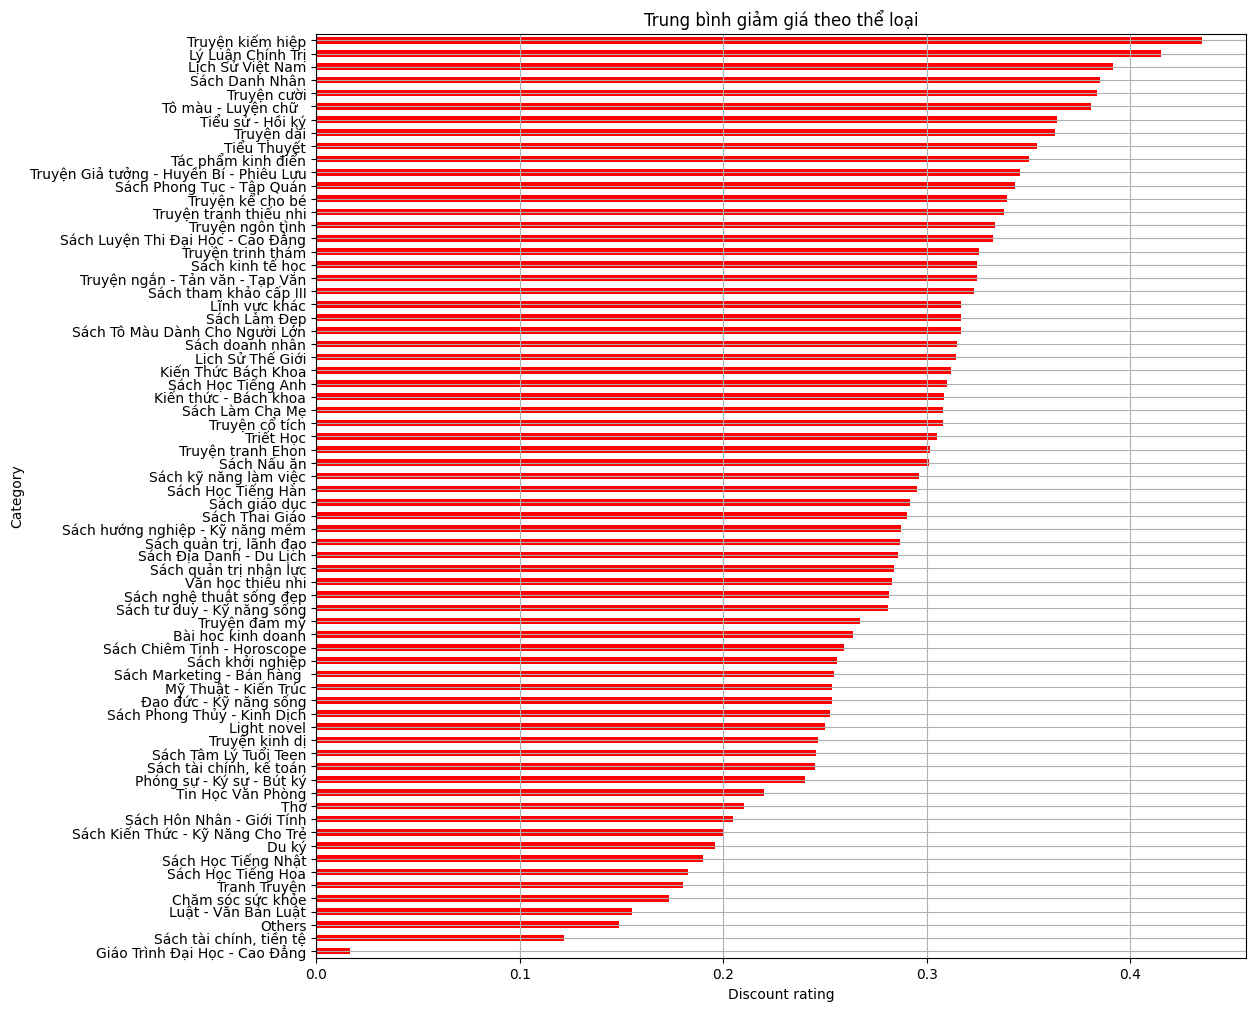

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax=Book.groupby('category').discount.mean().sort_values(ascending=True).plot(kind='barh', color='red')
plt.xlabel('Discount rating')
plt.ylabel('Category')
plt.title('Trung bình giảm giá theo thể loại')
plt.grid()
plt.show()

In [ ]:
Authors = Book.groupby('authors').discount.mean().sort_values(ascending=False).head(10)
Authors

authors
TS. Nguyễn Thị Hậu    0.8
Park Hee Jung         0.8
Lão Phạm              0.6
Martin Amis           0.6
Kim Jung - Hyuk       0.6
Yasushi Inoue         0.6
Kim Un Su             0.6
George Saunders       0.6
Ahmed Saadawi         0.6
Gárdos Péter          0.6
Name: discount, dtype: float64

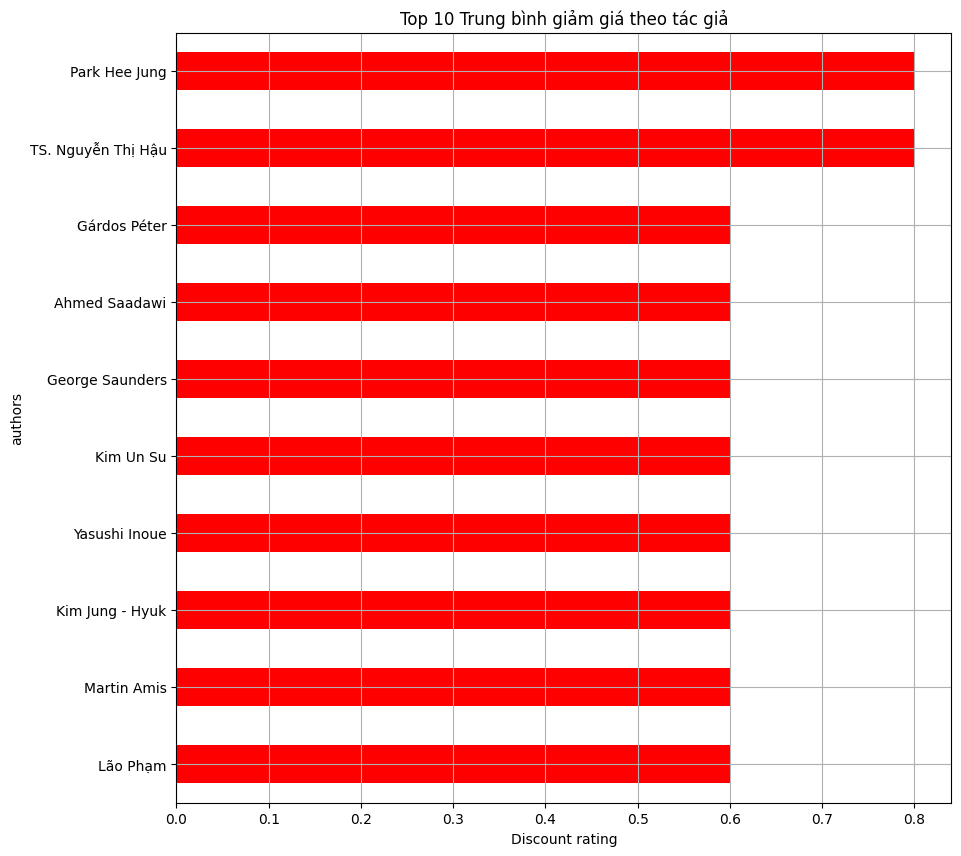

In [ ]:
# Giá giảm theo tác giả
fig, ax = plt.subplots(figsize=(10,10))
ax=Authors.sort_values(ascending=True).plot(kind='barh', color='red')
plt.xlabel('Discount rating')
plt.ylabel('authors')
plt.title('Top 10 Trung bình giảm giá theo tác giả')
plt.grid()
plt.show()

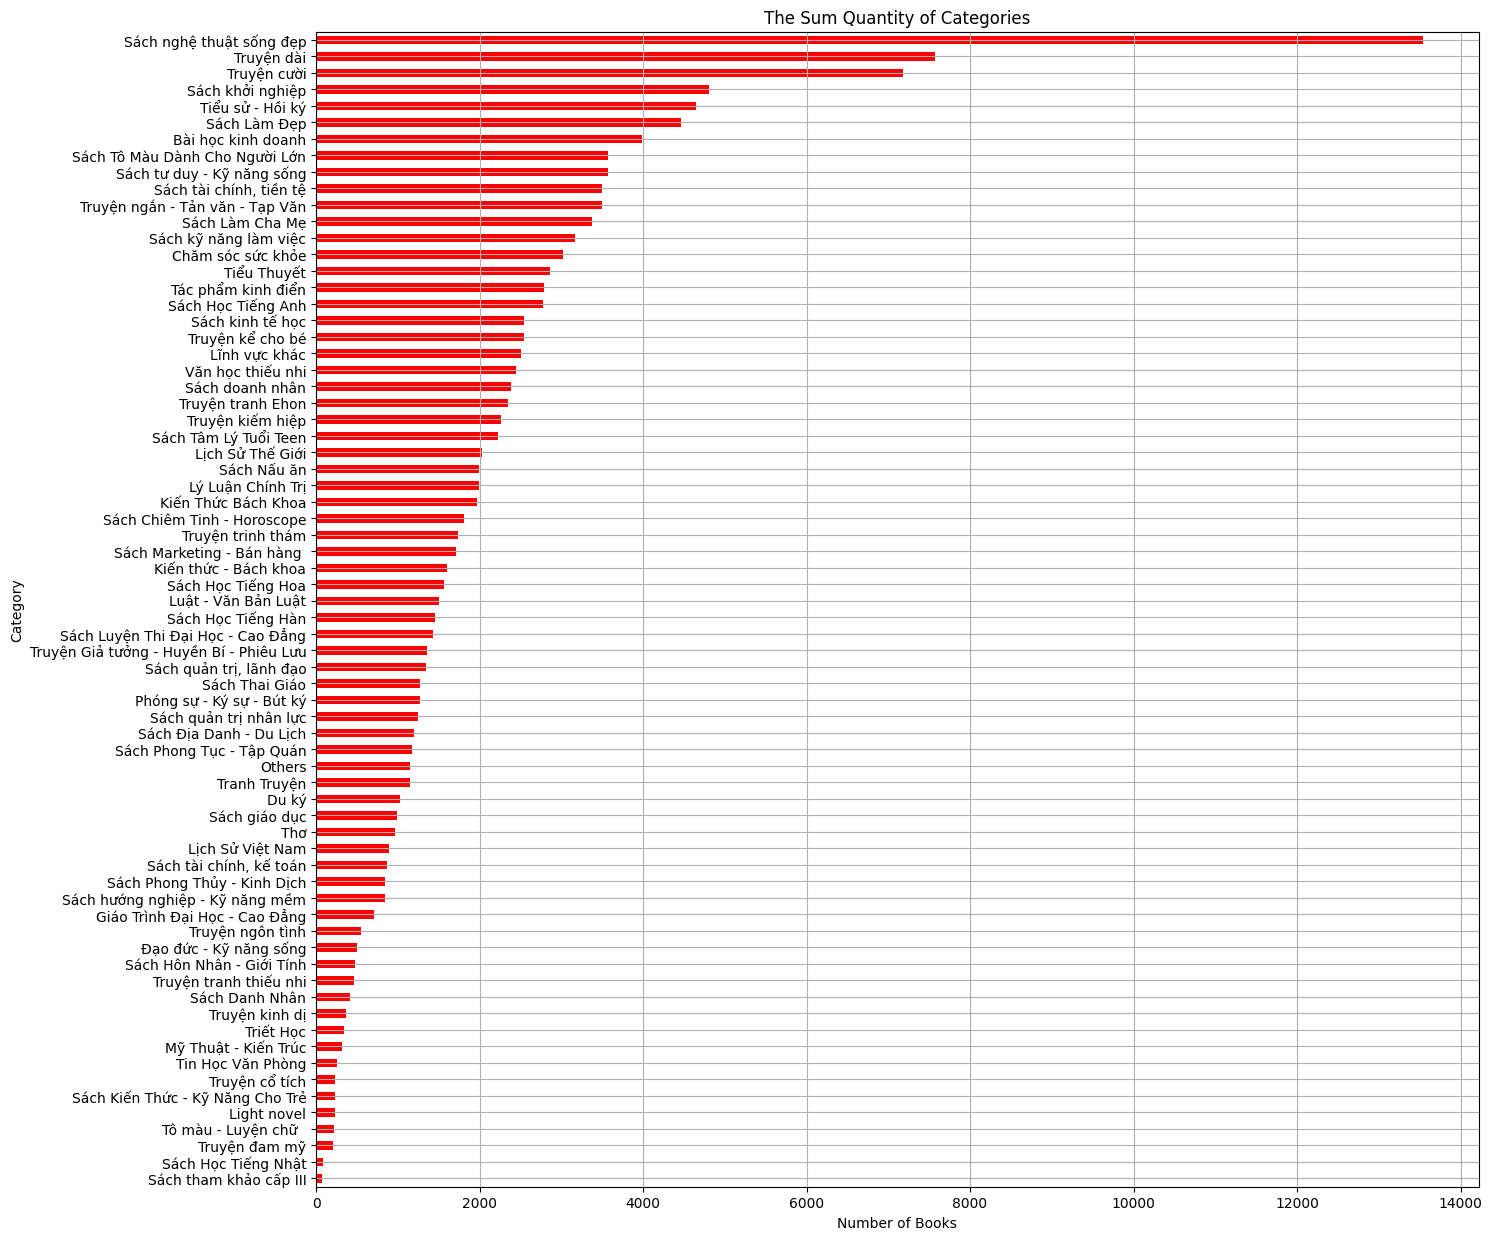

In [ ]:
# Sản lượng sách bán theo thể loại
fig, ax = plt.subplots(figsize=(15,15))
ax=Book.groupby('category').quantity.mean().sort_values(ascending=True).plot(kind='barh', color='red')
plt.xlabel('Number of Books')
plt.ylabel('Category')
plt.title('The Sum Quantity of Categories')
plt.grid()
plt.show()

In [ ]:
AuthorsQ = Book.groupby('authors').quantity.mean().sort_values(ascending=False).head(10)
AuthorsQ

authors
Tống Mặc                     65623.000000
Paul Kalanithi               59734.000000
José Mauro de Vasconcelos    53075.000000
Osho                         48799.071429
Ibuka Masaru                 36933.000000
Phil Town                    31234.000000
Allan & Barbara Pease        30490.000000
Ngô Sa Thạch                 27672.000000
Hae Min                      27278.333333
Koga Fumitake                26284.500000
Name: quantity, dtype: float64

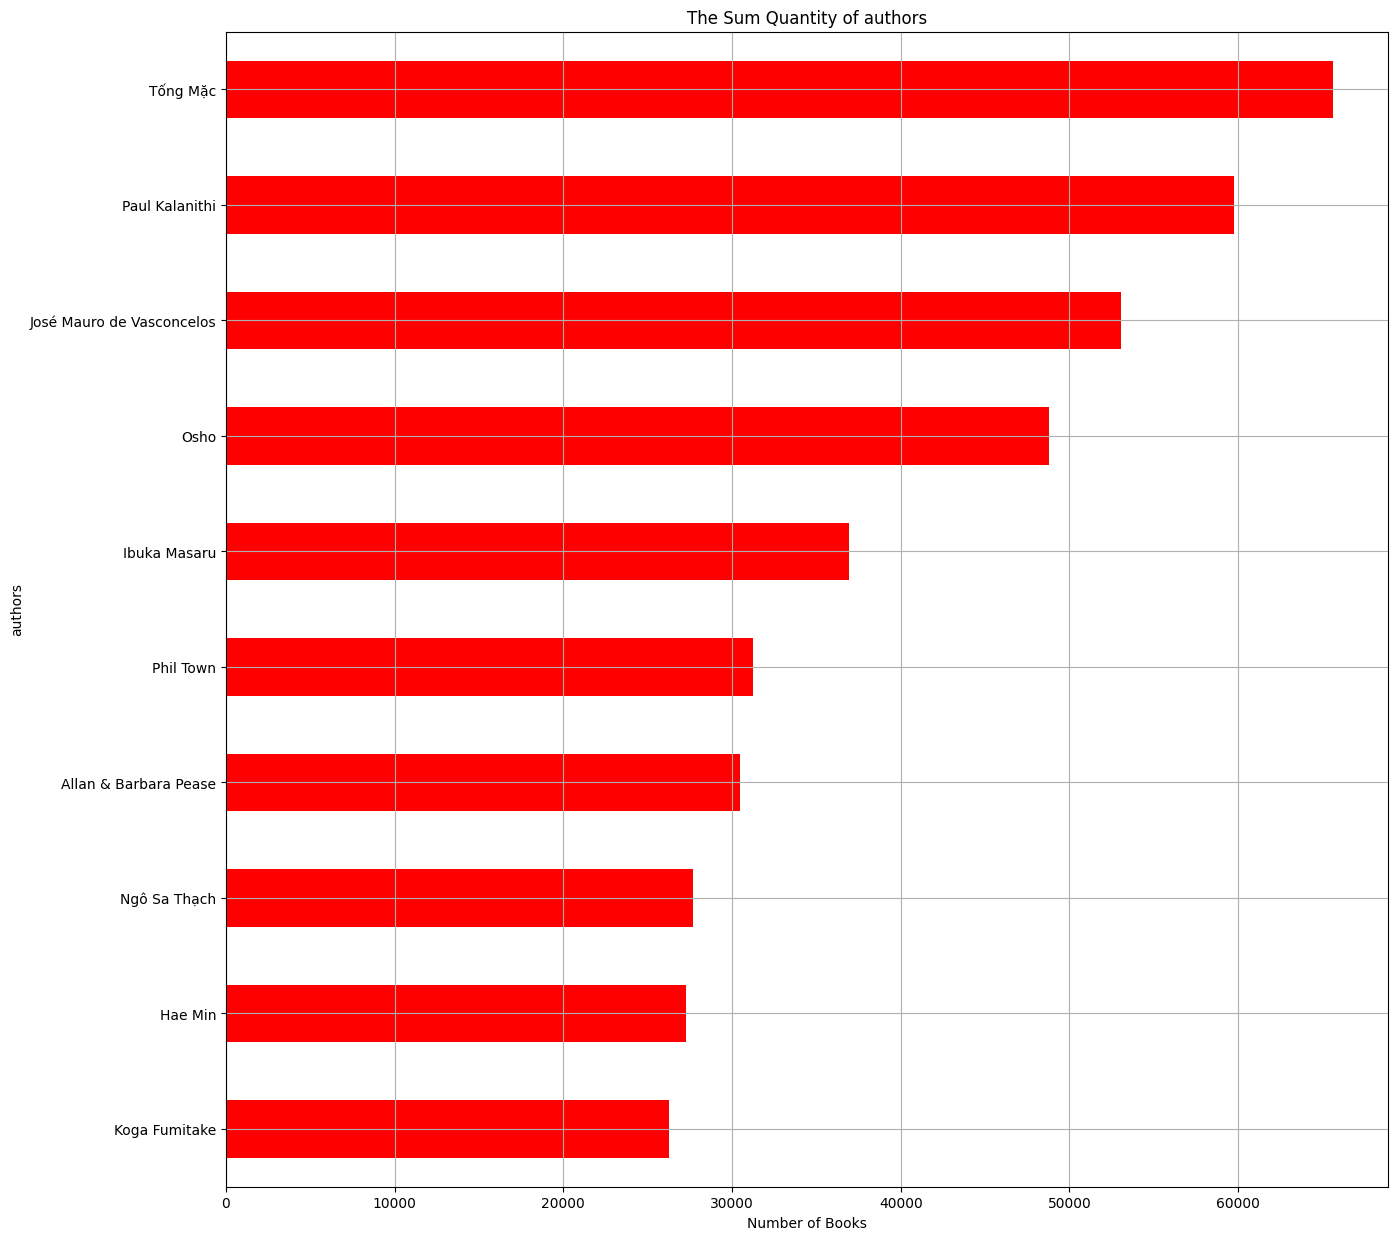

In [ ]:
# Sản lượng bán theo tác giả
fig, ax = plt.subplots(figsize=(15,15))
ax=AuthorsQ.sort_values(ascending=True).plot(kind='barh', color='red')
plt.xlabel('Number of Books')
plt.ylabel('authors')
plt.title('The Sum Quantity of authors')
plt.grid()
plt.show()

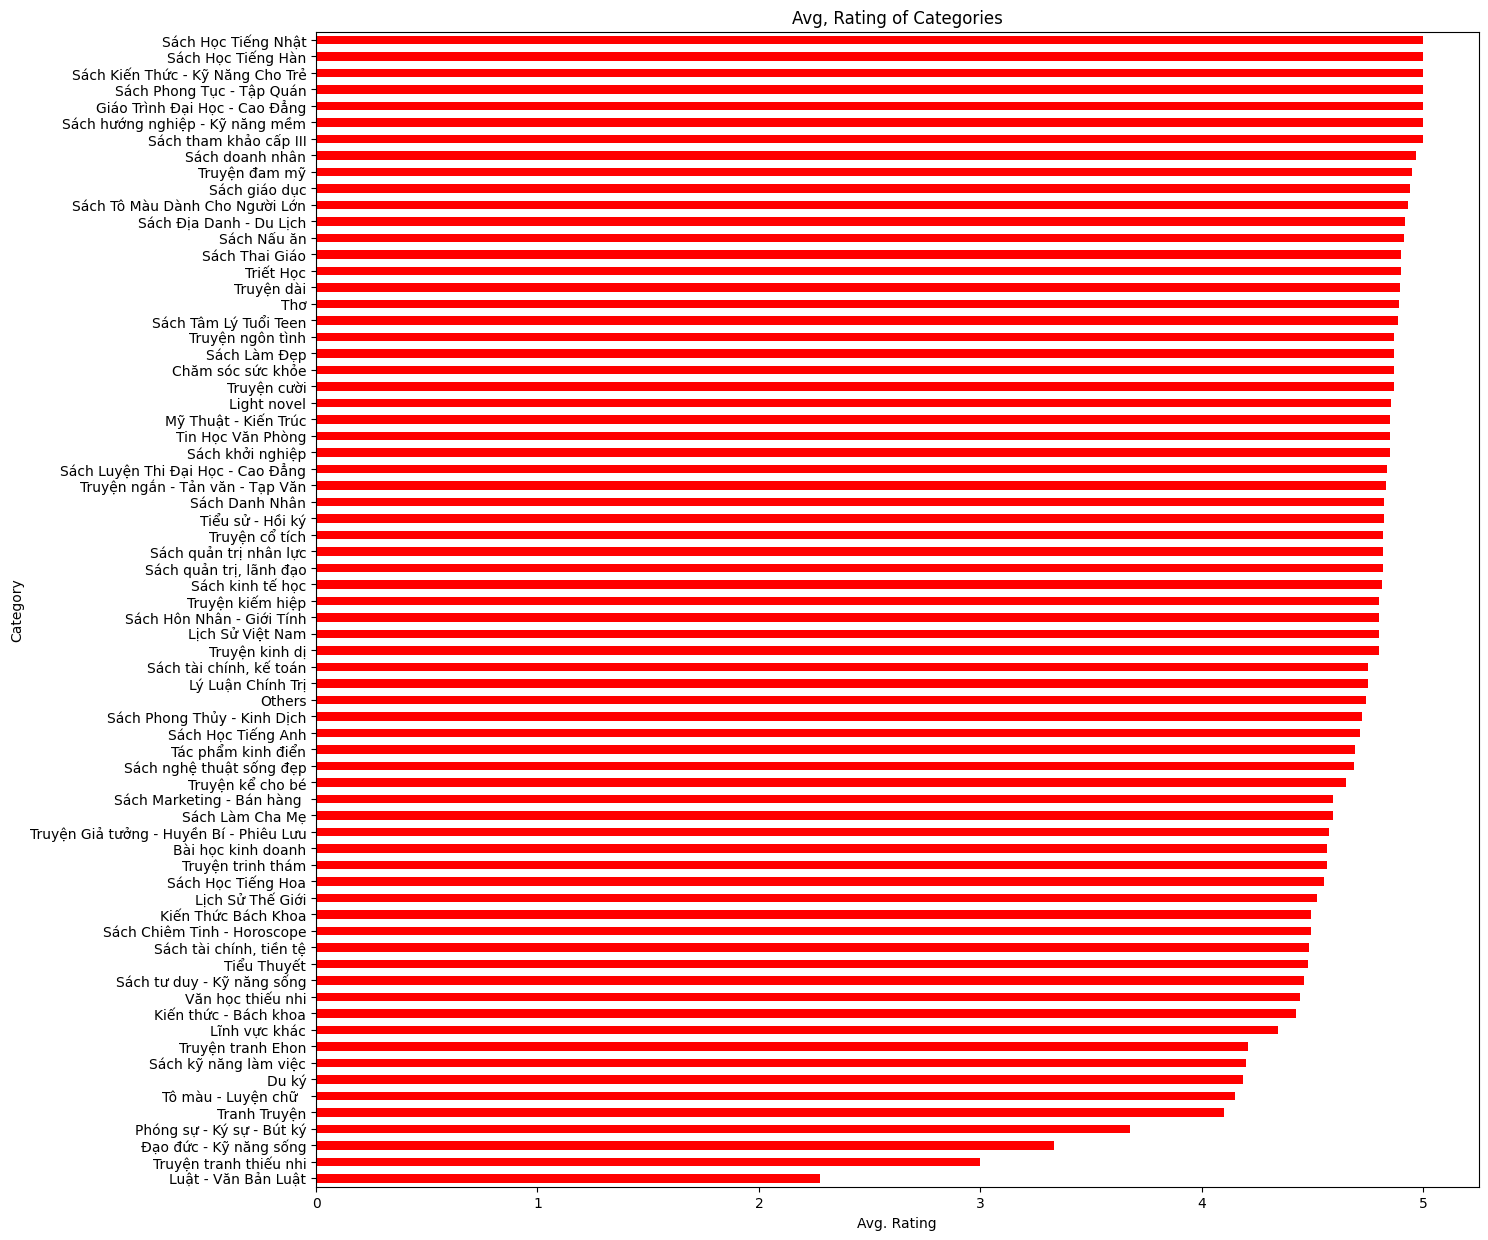

In [ ]:
# Đánh giá theo thể loại
fig, ax = plt.subplots(figsize=(15,15))
ax=Book.groupby('category').avg_rating.mean().sort_values(ascending=True).plot(kind='barh', color='red')
plt.xlabel('Avg. Rating')
plt.ylabel('Category')
plt.title('Avg, Rating of Categories')
plt.show()

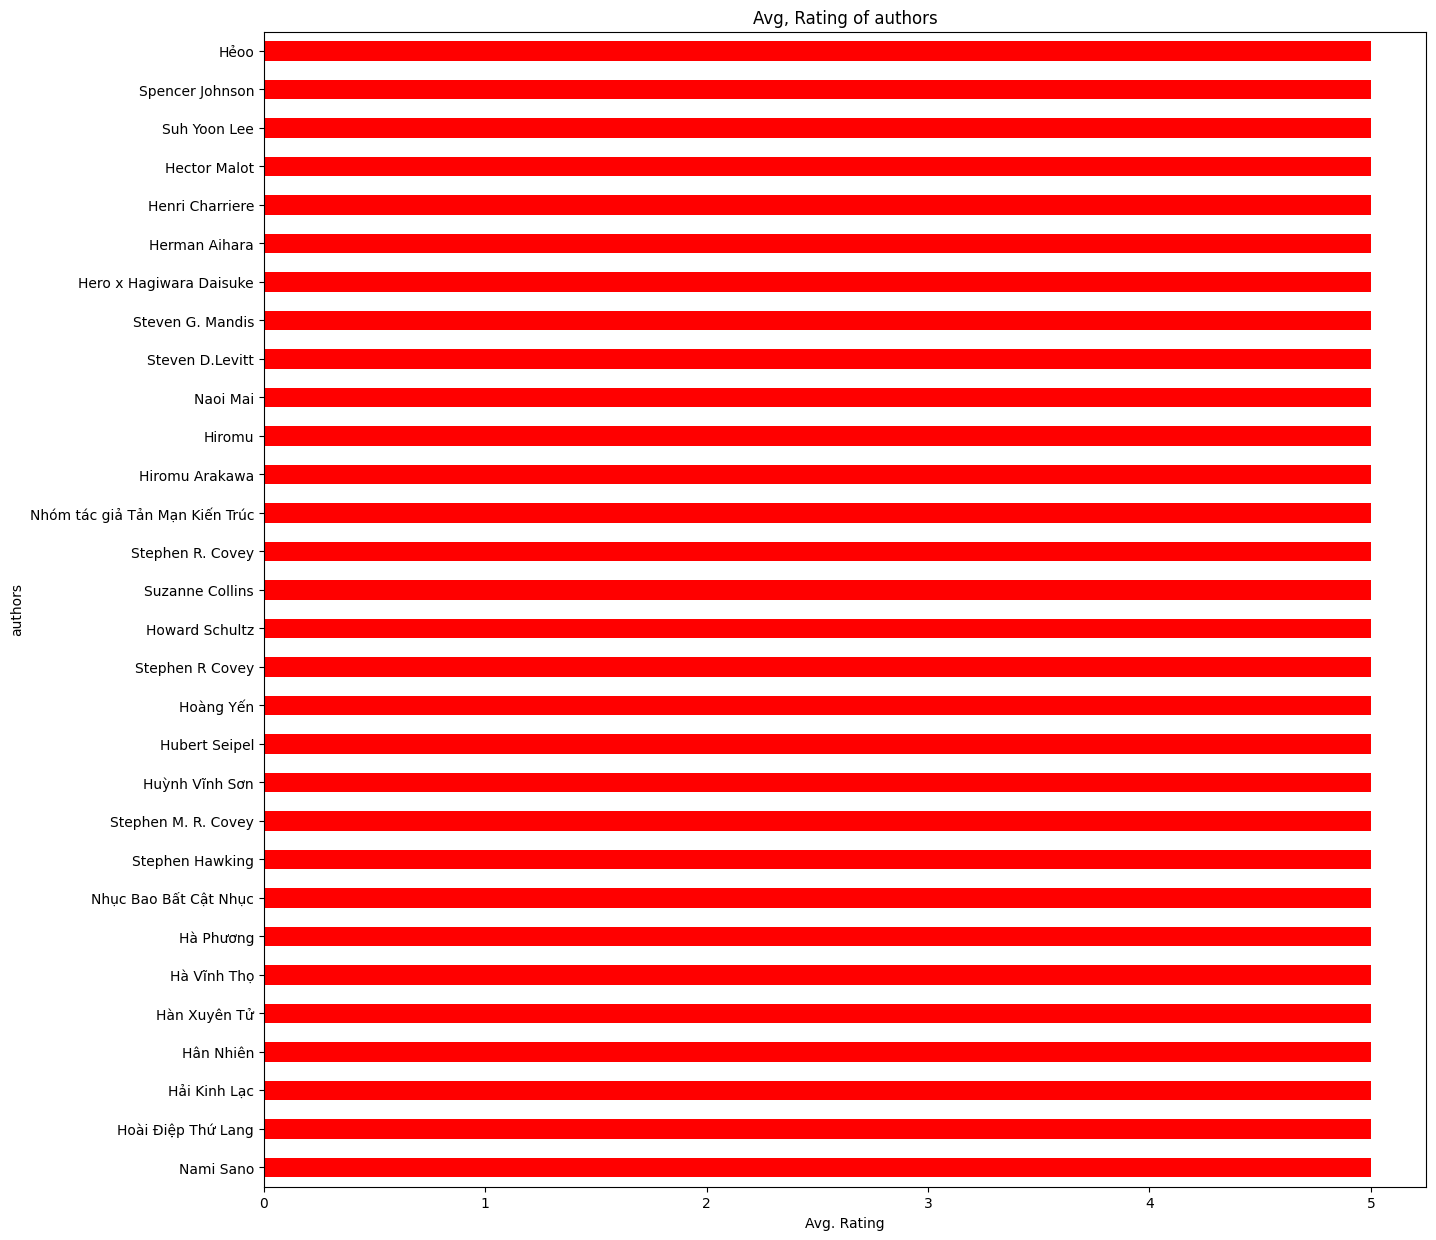

In [ ]:
# Đánh giá theo Tác giả
fig, ax = plt.subplots(figsize=(15,15))
ax=Book.groupby('authors').avg_rating.mean().sort_values(ascending=False).head(30).plot(kind='barh', color='red')
plt.xlabel('Avg. Rating')
plt.ylabel('authors')
plt.title('Avg, Rating of authors')
plt.show()

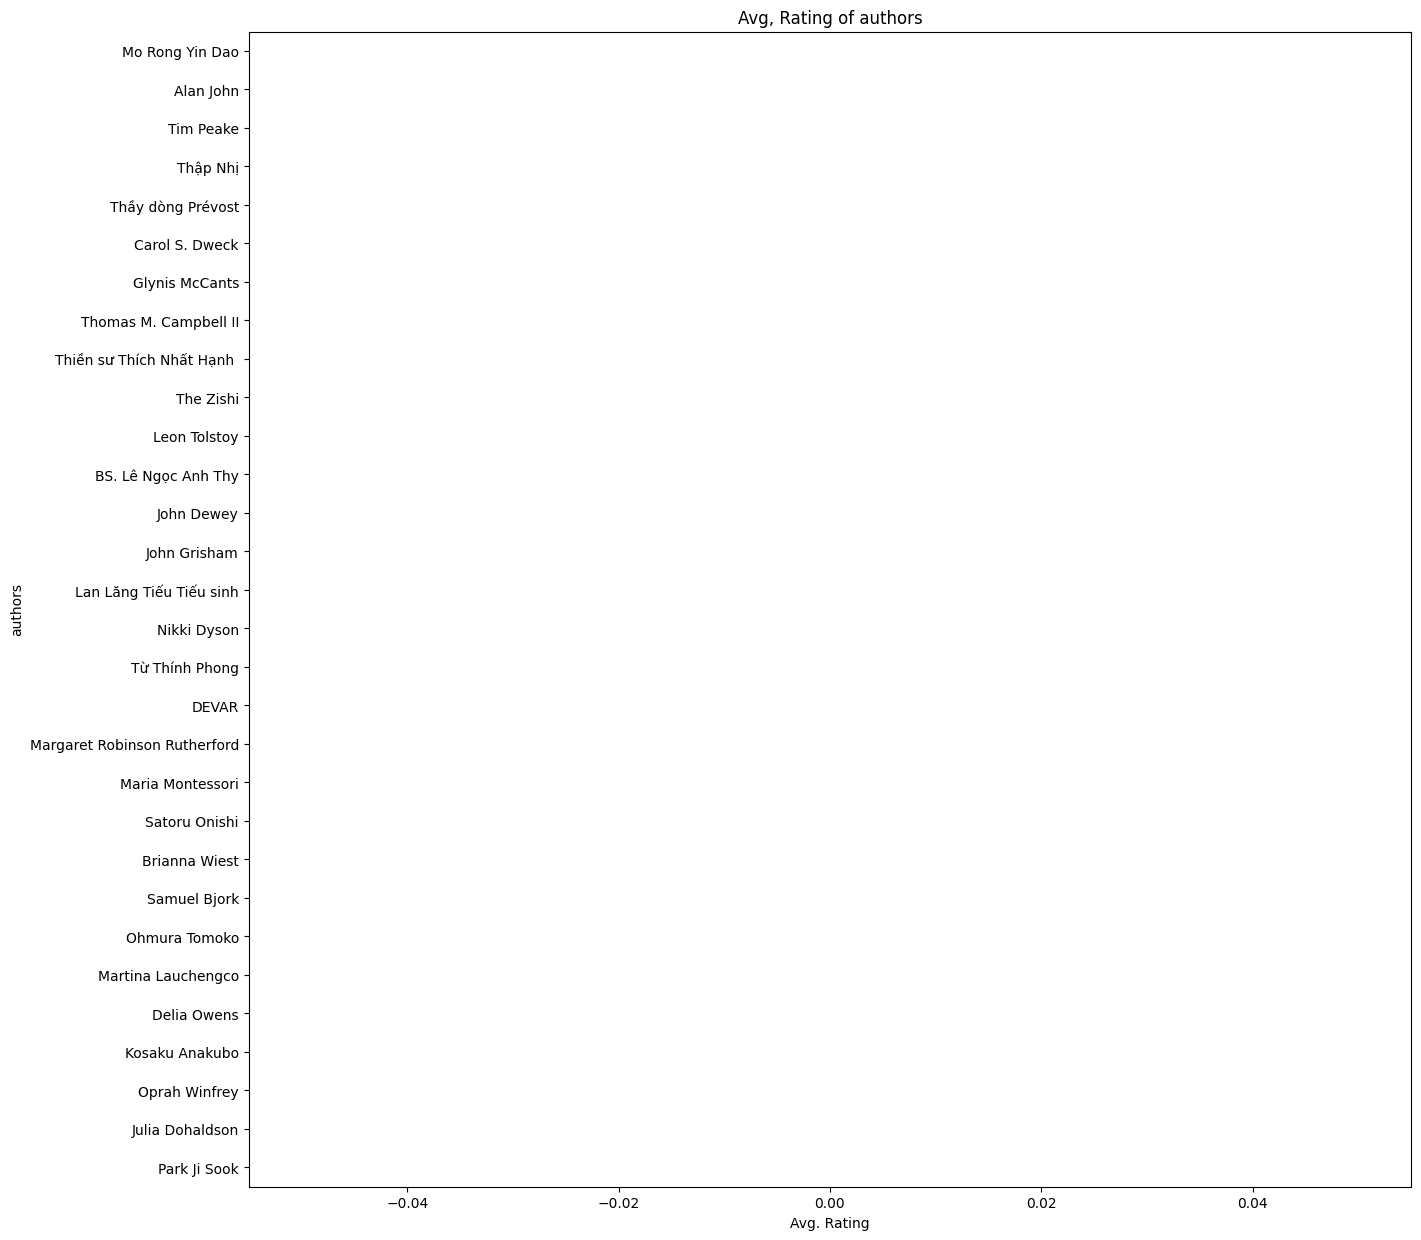

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax=Book.groupby('authors').avg_rating.mean().sort_values(ascending=True).head(30).plot(kind='barh', color='red')
plt.xlabel('Avg. Rating')
plt.ylabel('authors')
plt.title('Avg, Rating of authors')
plt.show()

In [ ]:
# Thể loại truyện có lượng giảm giá nhiều nhất nhưng sản lượng bán ra tương đối thấp không cao
# Lọc danh sách top seller, top tác giả được nhiều người yêu thích nhất, top bán chậm nhất, top tác giả ít được yêu thích nhất
# Dựa vào bảng tương quan nhận thấy thể loại, tác giả, n-review, rating và discount có phần tác động đến sản lượng mua sách => Tập trung phân tích những yếu tố này để lọc ra danh sách tiềm năng để đưa ra chương trình phù hợp kích cầu
# Thiết lập mô hình danh sách sách tiềm năng để đẩy mạnh sản phẩm
# Tìm những nguyên nhân chính dẫn đến bình luận xấu để cải thiện dịch vụ
# Giảm giá có quyết định mua hàng không?
# Giá tiền bị tác động bởi yếu tố nào?

In [ ]:
# Top seller dựa trên sl mua, lượt đánh giá, rate
Quantity_lst = Book.sort_values(by=['quantity'], ascending=False)
n_reviews_lst = Book.sort_values(by=['n_review'], ascending=False)
avg_rating_lst = Book.sort_values(by=['avg_rating'], ascending=False)
ListQ = list(Quantity_lst.title.head(50))
ListRev = list(n_reviews_lst.title.head(50))
ListRat = list(avg_rating_lst.title.head(1000))

In [ ]:
def common_member(ListQ, ListRev, ListRat):
    if list(set(ListQ) & set(ListRev) & set(ListRat)):
        print(set(ListQ) & set(ListRev) & set(ListRat))
    else:
        print("No common elements")
Topsell = list(set(ListQ) & set(ListRev) & set(ListRat))
Topsell

['Nhà Giả Kim (Tái Bản 2020)',
 'Hiểu Về Trái Tim (Tái Bản)',
 'Yêu Những Điều Không Hoàn Hảo',
 'Nóng Giận Là Bản Năng , Tĩnh Lặng Là Bản Lĩnh',
 'Những Tù Nhân Của Địa Lý',
 'Bí Mật Của Phan Thiên Ân',
 'Bước Chậm Lại Giữa Thế Gian Vội Vã (Tái Bản)',
 'Cây Cam Ngọt Của Tôi',
 'Thay Đổi Cuộc Sống Với Nhân Số Học',
 'Tâm Lý Học Về Tiền',
 'Muôn Kiếp Nhân Sinh 2',
 'Chuyện Con Mèo Dạy Hải Âu Bay (Tái Bản 2019)',
 'Hoàng Tử Bé (Tái Bản 2019)',
 'Thiên Tài Bên Trái, Kẻ Điên Bên Phải (Tái Bản)',
 'Dám Bị Ghét',
 'Hai Số Phận (Bìa Cứng)',
 'Tâm Lý Học - Phác Họa Chân Dung Kẻ Phạm Tội',
 'Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMIYA (Tái Bản)',
 'Chiến Binh Cầu Vồng (Tái Bản 2020)']

In [ ]:
Book.loc[Book.title.isin(Topsell)].reset_index(drop=True)

,Unnamed: 0,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,discount
0,0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
1,3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...,0.40
2,4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...,0.40
3,6,3304875,Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMIYA (Tái Bản),Higashino Keigo,105000,63000,25272.0,Truyện ngắn - Tản văn - Tạp Văn,3791,4.8,358,Unknown,https://salt.tikicdn.com/ts/product/dd/49/7f/a...,0.40
4,13,3954355,Yêu Những Điều Không Hoàn Hảo,Hae Min,139000,83400,33316.0,Truyện ngắn - Tản văn - Tạp Văn,3431,4.8,300,Unknown,https://salt.tikicdn.com/ts/product/54/55/d6/4...,0.40
5,14,42230121,Hiểu Về Trái Tim (Tái Bản),Minh Niệm,138000,95200,25230.0,Sách tư duy - Kỹ năng sống,2990,4.8,480,Unknown,https://salt.tikicdn.com/media/catalog/product...,0.31
6,16,52788072,Chiến Binh Cầu Vồng (Tái Bản 2020),Andrea Hirata,109000,65400,17175.0,Tiểu Thuyết,3033,4.8,428,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/a1/ef/4f/0...,0.40
7,17,109017985,"Thiên Tài Bên Trái, Kẻ Điên Bên Phải (Tái Bản)",Cao Minh,179000,115001,20322.0,Truyện ngắn - Tản văn - Tạp Văn,4863,4.8,424,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/38/bb/4b/5...,0.36
8,22,15267827,Hoàng Tử Bé (Tái Bản 2019),Antoine De Saint-Exupéry,75000,45000,20669.0,Truyện kể cho bé,3011,4.8,102,Unknown,https://salt.tikicdn.com/ts/product/5c/e7/68/2...,0.40
9,24,3639597,Bước Chậm Lại Giữa Thế Gian Vội Vã (Tái Bản),Hae Min,85000,51000,44869.0,Truyện ngắn - Tản văn - Tạp Văn,3702,4.8,256,Unknown,https://salt.tikicdn.com/ts/product/7a/18/8e/2...,0.40


In [ ]:
# Top tác giả được nhiều người yêu thích nhất
Book.groupby('authors').sum().sort_values(by=['quantity'], ascending=False).head(30)
Book.groupby('authors').sum().sort_values(by=['n_review'], ascending=False).head(30)

<ipython-input-158-b150b6e99de4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Book.groupby('authors').sum().sort_values(by=['quantity'], ascending=False).head(30)
<ipython-input-158-b150b6e99de4>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Book.groupby('authors').sum().sort_values(by=['n_review'], ascending=False).head(30)


,Unnamed: 0,product_id,original_price,current_price,quantity,n_review,avg_rating,pages,discount
authors,,,,,,,,,
Unknown,167484,18721101978,29547986,23863925,230639.123843,29294,632.9,54224,31.912411
Nguyên Phong,9279,1189295414,2562000,1706600,110413.471065,18021,63.8,6162,4.630000
Higashino Keigo,8449,1844750518,2932000,1844001,95736.000000,15999,97.2,7924,7.550000
Nguyễn Nhật Ánh,27146,3141410319,2744000,1902205,137755.000000,13291,116.1,6364,7.120000
José Mauro de Vasconcelos,0,74021317,108000,64800,53075.000000,11481,5.0,244,0.400000
Hae Min,269,92990115,448000,285401,81835.000000,7906,14.6,1012,1.130000
Cao Minh,5028,476173866,847000,576002,30135.000000,7257,24.3,1864,1.590000
Trang Anh,4300,404413656,1077000,692002,30230.000000,7227,24.1,2484,1.710000
Jeffrey Archer,1182,108557779,515000,320100,36544.000000,7112,14.2,2372,1.140000


In [ ]:
# Thiết lập mô hình danh sách tiềm năng để đẩy mạnh sản phẩm thể loại, tác giả, giảm giá. Lọc danh sách sách tiềm năng dựa trên thể loại và tác giả. Chạy mô hình dự đoán giá giảm giá thích hợp để phân phối số tiền giảm giá
Book.groupby('category').sum().sort_values(by=['quantity'], ascending=False).head(30)
Book.groupby('category').sum().sort_values(by=['n_review'], ascending=False).head(30)


<ipython-input-15-1c9ac8990c3c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Book.groupby('category').sum().sort_values(by=['quantity'], ascending=False).head(30)
<ipython-input-15-1c9ac8990c3c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Book.groupby('category').sum().sort_values(by=['n_review'], ascending=False).head(30)


,Unnamed: 0,product_id,original_price,current_price,quantity,n_review,avg_rating,pages,discount
category,,,,,,,,,
Sách tư duy - Kỹ năng sống,251792,32129278364,42901716,31182644,1.041774e+06,133150,1302.7,97153,82.020000
Truyện ngắn - Tản văn - Tạp Văn,87264,14067600843,11658000,7836019,3.809490e+05,54910,526.5,221418,35.360000
Tiểu Thuyết,102429,8629493597,17215000,11116817,3.810338e+05,53103,595.6,50539,47.070000
Others,243891,47727010679,27178800,21705998,3.262909e+05,49864,1351.1,95585,42.410000
Bài học kinh doanh,50282,4339380924,10784500,8110652,2.114210e+05,26591,242.1,19169,13.990000
Sách Học Tiếng Anh,38742,3735498773,10090000,6861442,1.137430e+05,20405,193.3,17559,12.702411
Sách kỹ năng làm việc,51412,4115294149,8551000,6061663,1.740959e+05,20268,231.1,17984,16.300000
"Sách tài chính, tiền tệ",32751,4838235860,13685500,12826700,1.399294e+05,20039,179.4,18111,4.870000
Tác phẩm kinh điển,30579,3242162394,7782000,5177803,1.057685e+05,17619,178.3,18350,13.300000


In [ ]:
# Top sản phẩm bán chậm nhất => Có tiến hành cắt giảm lượng sách này hoặc chương trình giảm giá để kích cầu hay không
Quantity_lst1 = Book.sort_values(by=['quantity'], ascending=True)
n_reviews_lst1 = Book.sort_values(by=['n_review'], ascending=True)
avg_rating_lst1 = Book.sort_values(by=['avg_rating'], ascending=True)
ListQ1 = list(Quantity_lst1.title.head(50))
ListRev1 = list(n_reviews_lst1.title.head(50))
ListRat1 = list(avg_rating_lst1.title.head(1000))
def common_member(ListQ1, ListRev1, ListRat1):
    if list(set(ListQ1) & set(ListRev1) & set(ListRat1)):
        print(set(ListQ1) & set(ListRev1) & set(ListRat1))
    else:
        print("No common elements")
Topsell1 = list(set(ListQ1) & set(ListRev1) & set(ListRat1))
Book.loc[Book.title.isin(Topsell1)].reset_index(drop=True)

,Unnamed: 0,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,discount
0,226,9948025,Thần Thoại Bắc Âu,Neil Gaiman,110000,88000,1.0,Truyện Giả tưởng - Huyền Bí - Phiêu Lưu,0,0.0,315,Nhà Xuất Bản Văn Học,https://salt.tikicdn.com/ts/product/f0/db/7f/4...,0.20
1,492,7326881,Những Nguyên Tắc Đạo Đức Trong Giáo Dục,John Dewey,50000,50000,3.0,Sách tư duy - Kỹ năng sống,0,0.0,96,Nhà Xuất Bản Đà Nẵng,https://salt.tikicdn.com/ts/product/b7/01/2c/c...,0.00
2,729,8965213,The Magic - Phép màu,Rhonda Byrne,198000,168000,6.0,Sách tư duy - Kỹ năng sống,0,0.0,260,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/dc/ef/0c/5...,0.15
3,756,103379152,Một Cuộc Đời Bất Tận,Frédéric Beigbeder,162000,138000,1.0,Truyện Giả tưởng - Huyền Bí - Phiêu Lưu,0,0.0,392,Nhà Xuất Bản Văn Học,https://salt.tikicdn.com/ts/product/cb/fb/58/8...,0.15
4,871,44976197,Mai Nương Lệ Cốt,Thầy dòng Prévost,79000,75050,7.0,Tiểu Thuyết,0,0.0,272,Nhà Xuất Bản Văn Học,https://salt.tikicdn.com/ts/product/e7/33/d5/c...,0.05
5,1014,195980676,Phượng Hoàng Tái Sinh - 12 Phẩm Chất Quan Trọn...,Unknown,152000,98800,2.0,Sách tư duy - Kỹ năng sống,0,0.0,264,Nhà Xuất Bản Hồng Đức,https://salt.tikicdn.com/ts/product/35/1c/77/c...,0.35
6,1086,27962195,Ehon Thông Minh Cho Trẻ Mẫu Giáo - Kẹt Xe Lâu Quá,Ohmura Tomoko,52000,44000,1.0,Truyện tranh Ehon,0,0.0,38,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/80/18/c0/e...,0.15
7,1094,10694714,"Làm Chủ Tư Duy, Thay Đổi Vận Mệnh (Tái Bản 2019)",Adam Khoo,165000,131700,1.0,Sách kỹ năng làm việc,0,0.0,456,Nhà Xuất Bản Phụ Nữ,https://salt.tikicdn.com/ts/product/31/b9/45/e...,0.20
8,1268,207256575,Định luật Murphy – Mọi bí mật tâm lý thao túng...,Từ Thính Phong,119000,92400,8.0,Lĩnh vực khác,0,0.0,280,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/11/b9/cd/6...,0.22
9,1320,45321596,Bách Khoa Thư Thực Tế Ảo Tăng Cường - Khủng Lo...,DEVAR,130000,123500,9.0,Kiến thức - Bách khoa,0,0.0,56,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/83/0b/42/2...,0.05


In [ ]:
# Top tác giả, thể loại không được yêu thích nhất
Book.groupby('category').sum().sort_values(by=['quantity'], ascending=True).head(30)
Book.groupby('category').sum().sort_values(by=['n_review'], ascending=True).head(30)

<ipython-input-18-c267c84ea2cf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Book.groupby('category').sum().sort_values(by=['quantity'], ascending=True).head(30)
<ipython-input-18-c267c84ea2cf>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Book.groupby('category').sum().sort_values(by=['n_review'], ascending=True).head(30)


,Unnamed: 0,product_id,original_price,current_price,quantity,n_review,avg_rating,pages,discount
category,,,,,,,,,
Sách Học Tiếng Nhật,3020,238261337,274000,218550,169.000000,33,10.0,712,0.38
Sách tham khảo cấp III,4469,493080484,643000,428750,207.000000,35,15.0,1068,0.97
Sách Kiến Thức - Kỹ Năng Cho Trẻ,2032,336055472,670000,638000,465.000000,47,10.0,476,0.40
Luật - Văn Bản Luật,5630,640347989,492000,418000,6040.942130,69,9.1,1400,0.62
Tin Học Văn Phòng,2298,285228510,478000,383100,502.000000,100,9.7,607,0.44
Đạo đức - Kỹ năng sống,3895,492551771,247000,211201,1492.000000,205,10.0,552,0.76
Truyện cổ tích,6707,585278150,916000,595800,1186.000000,265,24.1,2036,1.54
"Sách tài chính, kế toán",2852,59487279,890000,668000,1748.000000,266,9.5,1377,0.49
Sách Danh Nhân,4658,474014302,1021000,645500,1645.000000,327,19.3,1740,1.54


In [ ]:
Book.groupby('authors').sum().sort_values(by=['quantity'], ascending=True).head(30)
Book.groupby('authors').sum().sort_values(by=['n_review'], ascending=True).head(30)

<ipython-input-19-e1fe28b99b50>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Book.groupby('authors').sum().sort_values(by=['quantity'], ascending=True).head(30)
<ipython-input-19-e1fe28b99b50>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Book.groupby('authors').sum().sort_values(by=['n_review'], ascending=True).head(30)


,Unnamed: 0,product_id,original_price,current_price,quantity,n_review,avg_rating,pages,discount
authors,,,,,,,,,
Phùng Kí Tài,1666,192721381,225000,225000,1.000000,0,0.0,390,0.00
Dr. Joseph Murphy,908,187622581,128000,115200,2802.471065,0,0.0,200,0.10
Alan John,1289,205039747,168000,134000,30.000000,0,0.0,264,0.20
Leon Tolstoy,528,12055610,50000,45000,9.000000,0,0.0,80,0.10
Satoru Onishi,1704,72540039,156000,133000,2802.471065,0,0.0,456,0.15
Philip Kolter,793,135350713,999000,799200,2802.471065,0,0.0,1082,0.20
Thomas M. Campbell II,1768,995310,255000,255000,5.000000,0,0.0,647,0.00
Thiền sư Thích Nhất Hạnh,1751,113575309,280000,280000,1.000000,0,0.0,456,0.00
The Zishi,1203,1672721,55000,47000,2802.471065,0,0.0,456,0.15


In [ ]:
# Top 10 tác giả được yêu thích nhất thuộc thể loại được tìm kiếm nhiều nhất
# Chọn top tác giả xong match với top thể loại có tác giả đó không => ds tiềm năng vì thường ngta có xu hướng mua những quyển sách của tác giả mình yêu thích hơn là thể loại, chọn ra những thông tin tác giả tiềm năng để tạo thành list ds tiềm năng
Book.query('category == "Sách tư duy - Kỹ năng sống"')\
        .sort_values(by='quantity', ascending=False)\
        .reset_index(drop=True)\
        .drop(['category'], axis=1).head(5)

,Unnamed: 0,product_id,title,authors,original_price,current_price,quantity,n_review,avg_rating,pages,manufacturer,cover_link,discount
0,42,26114399,"Nóng Giận Là Bản Năng , Tĩnh Lặng Là Bản Lĩnh",Tống Mặc,89000,57001,65623.0,6602,4.8,264,Unknown,https://salt.tikicdn.com/ts/product/70/9a/98/e...,0.36
1,51,10005245,Đàn Ông Sao Hỏa Đàn Bà Sao Kim,John Gray,188000,135300,48419.0,3904,4.7,488,Unknown,https://salt.tikicdn.com/ts/product/0a/f6/38/b...,0.28
2,323,8835159,Đời Ngắn Đừng Ngủ Dài (Tái Bản),Robin Sharma,75000,55500,44164.0,3073,4.8,228,Unknown,https://salt.tikicdn.com/ts/product/d4/cc/86/2...,0.26
3,72,381234,Cuốn Sách Hoàn Hảo Về Ngôn Ngữ Cơ Thể - Body L...,Allan & Barbara Pease,198000,159000,30490.0,1076,4.7,456,Unknown,https://salt.tikicdn.com/ts/product/6f/e9/0c/3...,0.20
4,14,42230121,Hiểu Về Trái Tim (Tái Bản),Minh Niệm,138000,95200,25230.0,2990,4.8,480,Unknown,https://salt.tikicdn.com/media/catalog/product...,0.31


In [ ]:
Book.query('category == "Tiểu Thuyết"')\
        .sort_values(by='quantity', ascending=False)\
        .reset_index(drop=True)\
        .drop(['category'], axis=1).head(5)

,Unnamed: 0,product_id,title,authors,original_price,current_price,quantity,n_review,avg_rating,pages,manufacturer,cover_link,discount
0,0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.4
1,32,1476937,Dám Bị Ghét,Koga Fumitake,96000,57600,45858.0,3457,4.8,336,Unknown,https://salt.tikicdn.com/ts/product/74/11/ff/6...,0.4
2,158,35191892,21 Bài Học Cho Thế Kỷ 21,Yuval Noah Harari,209000,125400,18353.0,1681,4.6,434,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/53/8e/07/6...,0.4
3,1306,7644510,Lòng Tốt Của Bạn Cần Thêm Đôi Phần Sắc Sảo,Mộ Nhan Ca,108000,64800,18054.0,616,4.6,264,Unknown,https://salt.tikicdn.com/ts/product/c3/8d/24/6...,0.4
4,16,52788072,Chiến Binh Cầu Vồng (Tái Bản 2020),Andrea Hirata,109000,65400,17175.0,3033,4.8,428,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/a1/ef/4f/0...,0.4


In [ ]:
Book.query('category == "Truyện ngắn - Tản văn - Tạp Văn"')\
        .sort_values(by='quantity', ascending=False)\
        .reset_index(drop=True)\
        .drop(['category'], axis=1).head(5)

,Unnamed: 0,product_id,title,authors,original_price,current_price,quantity,n_review,avg_rating,pages,manufacturer,cover_link,discount
0,24,3639597,Bước Chậm Lại Giữa Thế Gian Vội Vã (Tái Bản),Hae Min,85000,51000,44869.0,3702,4.8,256,Unknown,https://salt.tikicdn.com/ts/product/7a/18/8e/2...,0.40
1,13,3954355,Yêu Những Điều Không Hoàn Hảo,Hae Min,139000,83400,33316.0,3431,4.8,300,Unknown,https://salt.tikicdn.com/ts/product/54/55/d6/4...,0.40
2,702,50751279,Vui Vẻ Không Quạu Nha - Tản Văn,Ở Đây Zui Nè,69000,45001,32331.0,5255,4.7,280,Nhà Xuất Bản Phụ Nữ,https://salt.tikicdn.com/ts/product/b2/56/d3/1...,0.35
3,6,3304875,Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMIYA (Tái Bản),Higashino Keigo,105000,63000,25272.0,3791,4.8,358,Unknown,https://salt.tikicdn.com/ts/product/dd/49/7f/a...,0.40
4,623,970417,Cây Chuối Non Đi Giày Xanh - Bìa Mềm,Nguyễn Nhật Ánh,110000,81400,23942.0,801,4.8,304,Unknown,https://salt.tikicdn.com/ts/product/ed/77/8c/0...,0.26


In [12]:
# Phân loại sách clustering
# Encode cho bộ dữ liệu
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
BookEncode = Book[['title','authors','category','manufacturer','original_price',	'current_price',	'quantity',	'n_review',	'avg_rating',	'pages',	'manufacturer']].apply(encode.fit_transform)
BookEncode

,title,authors,category,manufacturer,original_price,current_price,quantity,n_review,avg_rating,pages,manufacturer
0,403,418,49,12,69,214,1186,640,13,121,12
1,644,670,45,25,50,182,1067,465,12,76,25
2,1045,917,9,12,140,544,1144,621,12,249,12
3,1005,726,66,9,43,112,1165,633,13,110,9
4,932,986,49,12,92,323,1098,565,12,167,12
...,...,...,...,...,...,...,...,...,...,...,...
1763,39,857,45,30,164,701,69,7,13,265,30
1764,387,97,52,13,48,119,131,20,13,115,13
1765,1733,988,24,38,69,94,520,47,10,160,38
1766,1006,400,41,17,120,471,298,33,13,254,17


In [13]:
# Scaling cho bộ dữ liệu để số chính xác hơn
from sklearn.preprocessing import MinMaxScaler
cols = BookEncode.columns
ms = MinMaxScaler()
BookEncode = ms.fit_transform(BookEncode)
BookEncode = pd.DataFrame(BookEncode, columns=[cols])
BookEncode.head()

,title,authors,category,manufacturer,original_price,current_price,quantity,n_review,avg_rating,pages,manufacturer
0,0.228070,0.386322,0.710145,0.315789,0.251825,0.247972,0.997477,1.000000,1.000000,0.308673,0.315789
1,0.364460,0.619224,0.652174,0.657895,0.182482,0.210892,0.897393,0.726562,0.923077,0.193878,0.657895
2,0.591398,0.847505,0.130435,0.315789,0.510949,0.630359,0.962153,0.970313,0.923077,0.635204,0.315789
3,0.568761,0.670980,0.956522,0.236842,0.156934,0.129780,0.979815,0.989063,1.000000,0.280612,0.236842
4,0.527448,0.911275,0.710145,0.315789,0.335766,0.374276,0.923465,0.882812,0.923077,0.426020,0.315789


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

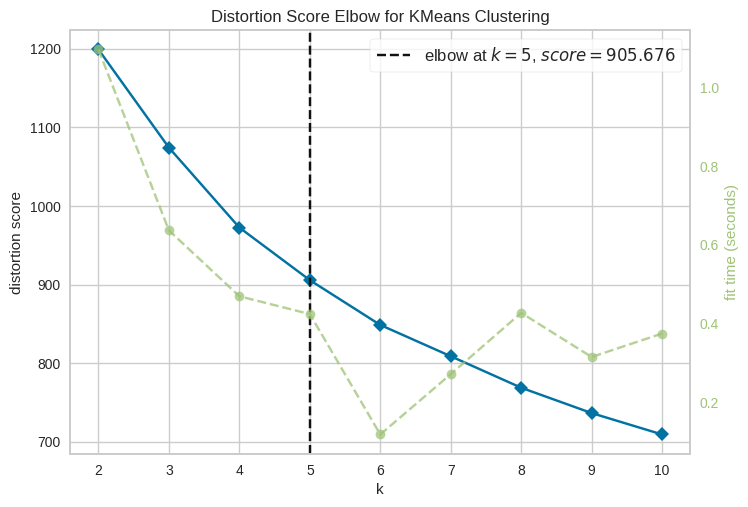

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
# elbow để tìm ra số cụm, dựa trên hình vẽ thấy số cụm là 5
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(BookEncode)
Elbow_M.show()

In [42]:
# Áp dụng model vào
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=5)
yhat_AC = AC.fit_predict(BookEncode)
BookEncode["Clusters"] = yhat_AC
Book["Clusters"]= yhat_AC

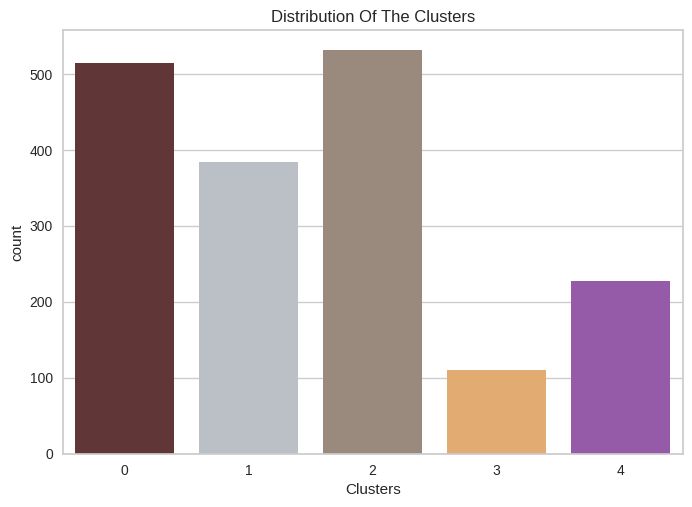

In [44]:
# 0,4 Tiềm năng, 1,2 bình thường, 3 ít tiềm năng
import seaborn as sns
import matplotlib.pyplot as plt
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60","#9d4eb5"]
pl = sns.countplot(x=Book["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 89.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 96.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 97.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 86.8% of the points cannot be plac

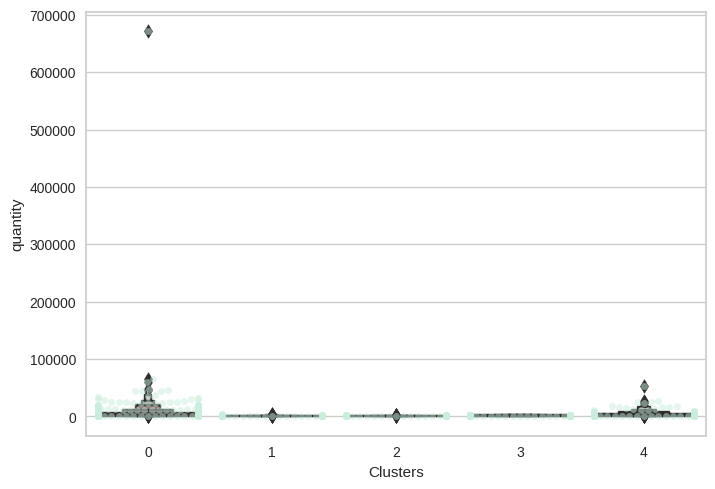

In [52]:
plt.figure()
pl=sns.swarmplot(x=Book["Clusters"], y=Book["quantity"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=Book["Clusters"], y=Book["quantity"], palette=pal)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 53.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 69.9% of the points cannot be plac

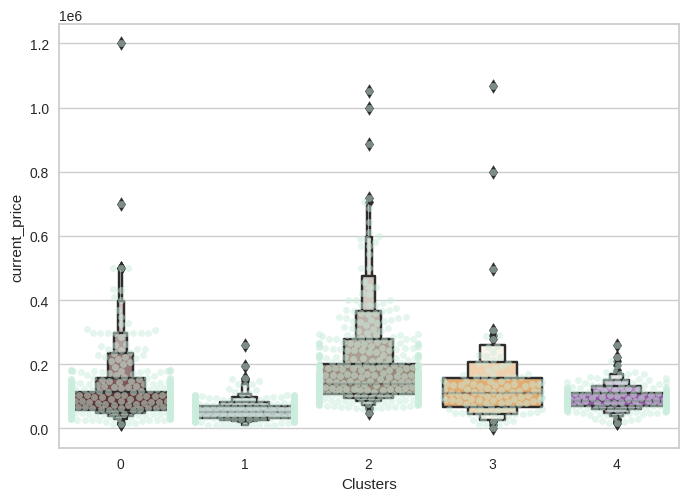

In [65]:
# Giá cả không quyết định đến sản lượng bán ra => DS tiềm năng dựa trên thể loại, tác giá, số lượng review hợp lý hơn
plt.figure()
pl=sns.swarmplot(x=Book["Clusters"], y=Book["current_price"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=Book["Clusters"], y=Book["current_price"], palette=pal)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 90.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 52.6% of the points cannot be plac

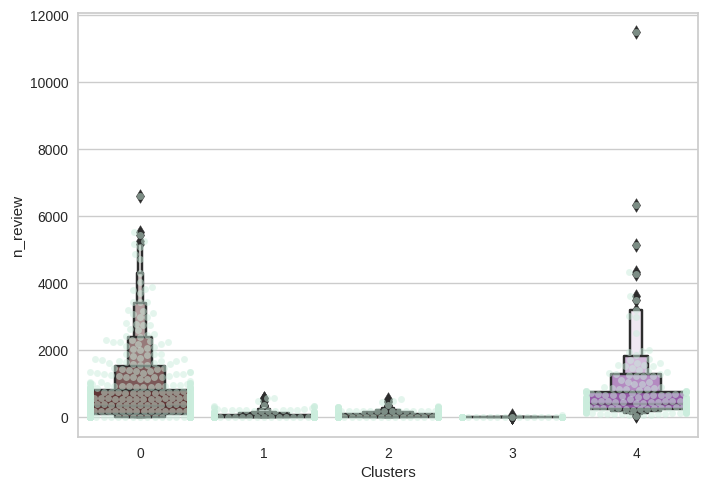

In [53]:
plt.figure()
pl=sns.swarmplot(x=Book["Clusters"], y=Book["n_review"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=Book["Clusters"], y=Book["n_review"], palette=pal)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 84.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 82.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 86.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 75.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 78.5% of the points cannot be plac

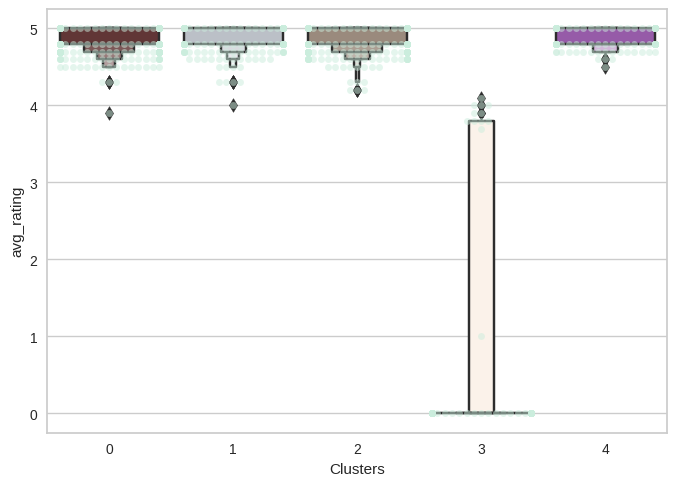

In [54]:
plt.figure()
pl=sns.swarmplot(x=Book["Clusters"], y=Book["avg_rating"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=Book["Clusters"], y=Book["avg_rating"], palette=pal)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7875 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND HOOK ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7929 (\N{LATIN SMALL LETTER Y WITH TILDE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missin

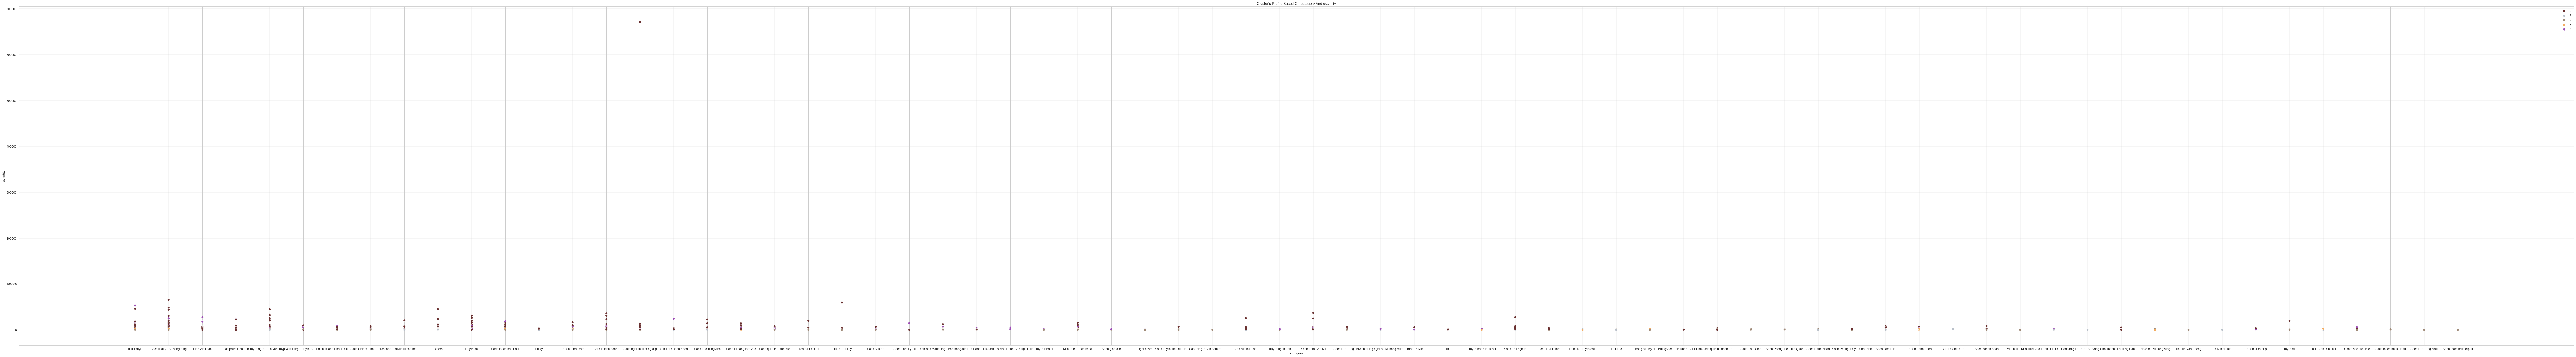

In [74]:
# Giá [Giá, thể loại, tác giả, sản lượng bán, giảm giá, đánh giá, review, nxb]
fig, ax = plt.subplots(figsize=(150,20))
pl = sns.scatterplot(data = Book,x=Book["category"], y=Book["quantity"],hue=Book["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On category And quantity")
plt.legend()
plt.show()

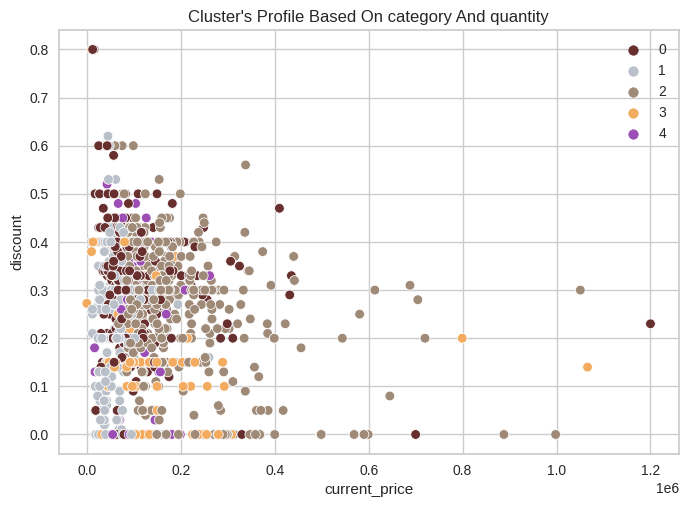

In [76]:
pl = sns.scatterplot(data = Book,x=Book["current_price"], y=Book["discount"],hue=Book["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On category And quantity")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7845 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7843 (\N{LATIN SMALL LETTER A WITH HOOK ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7897 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND DOT BELOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7899 (\N{LATIN SMALL LETTER O WITH HORN AND

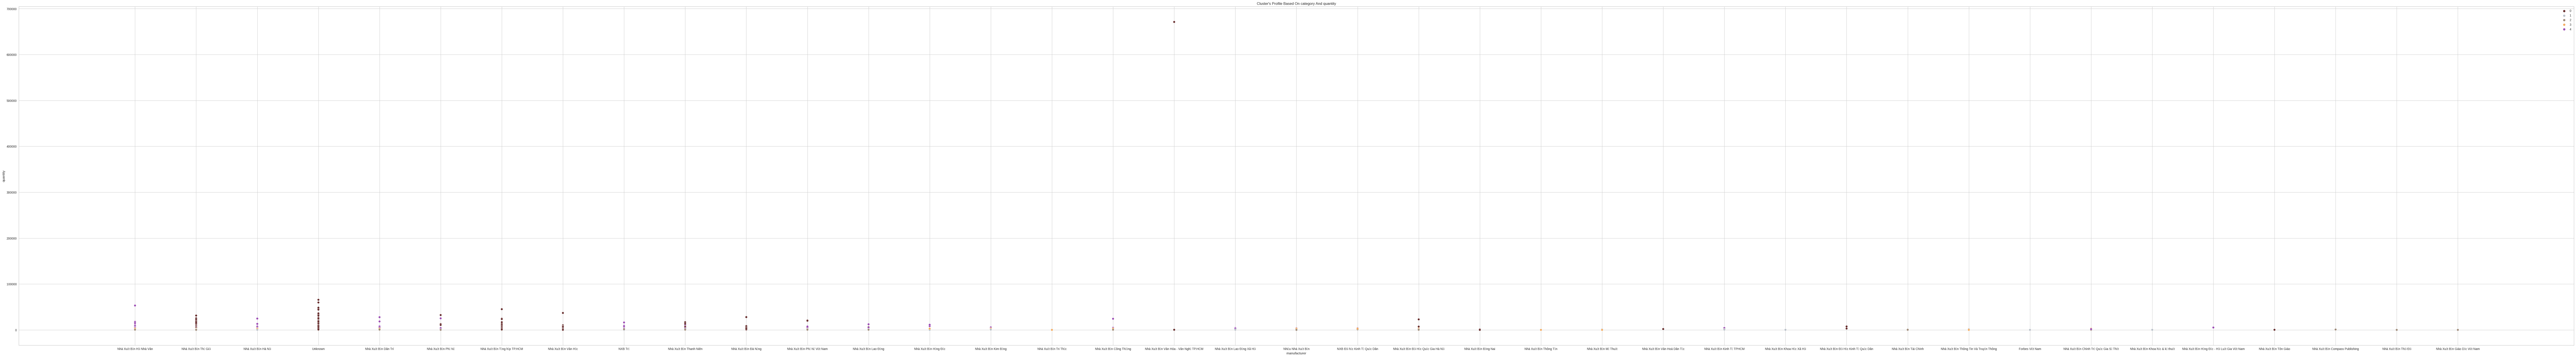

In [77]:
fig, ax = plt.subplots(figsize=(150,20))
pl = sns.scatterplot(data = Book,x=Book["manufacturer"], y=Book["quantity"],hue=Book["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On category And quantity")
plt.legend()
plt.show()

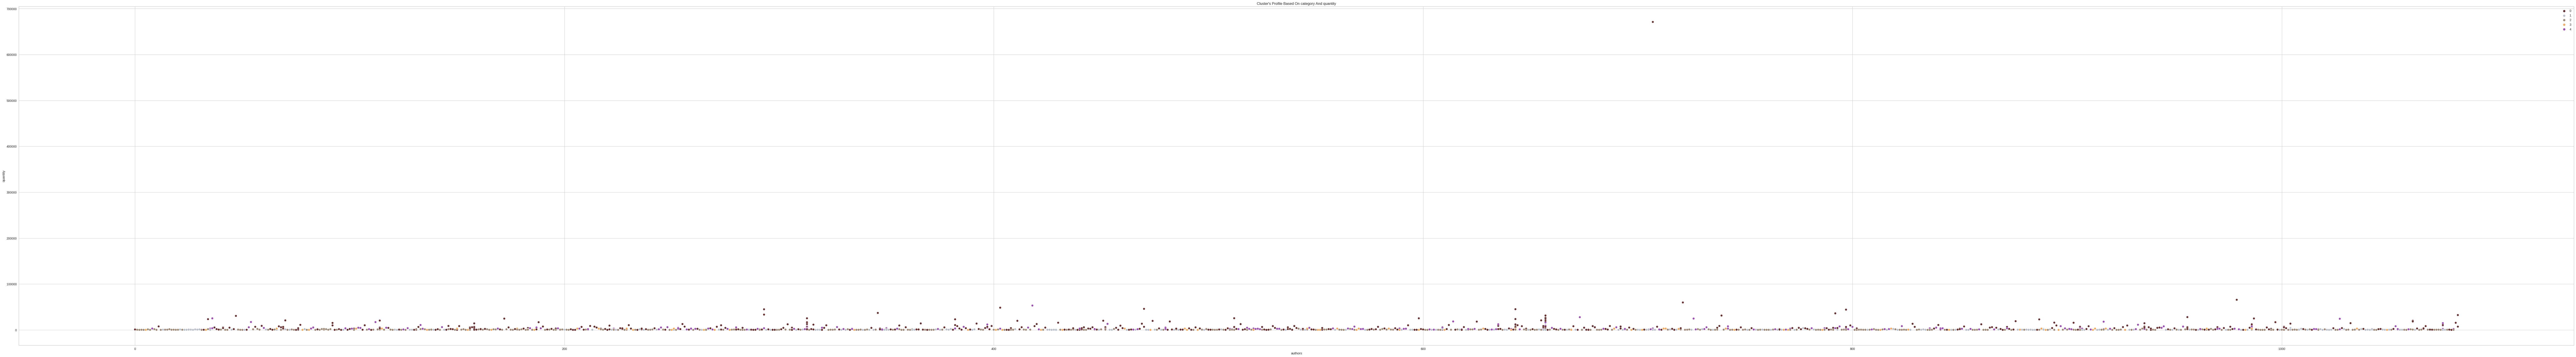

In [78]:
# Check tần xuất cụm 1 hay xuất hiện tác giả nào
fig, ax = plt.subplots(figsize=(150,20))
pl = sns.scatterplot(data = Book,x=Book["authors"], y=Book["quantity"],hue=Book["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On category And quantity")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 45.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.8% of the points cannot be plac

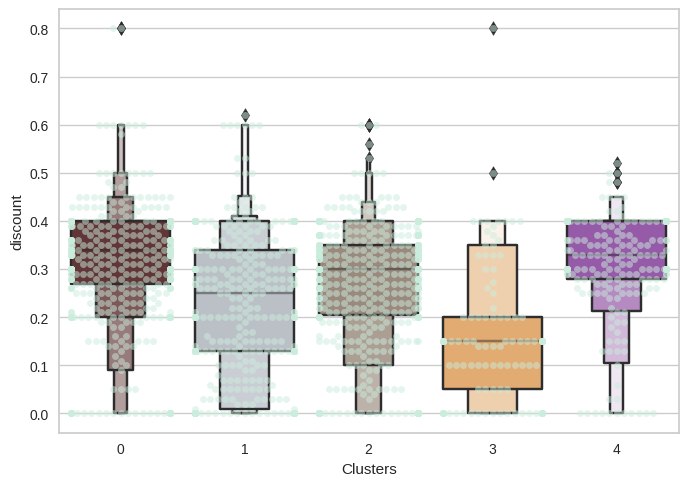

In [70]:
plt.figure()
pl=sns.swarmplot(x=Book["Clusters"], y=Book["discount"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=Book["Clusters"], y=Book["discount"], palette=pal)
plt.show()

In [ ]:
# Kết luận giá cả không ảnh hưởng bỏi số trang, top sell, top tác giả yêu thích
# Phân loại nhóm sách tiềm năng và không tiềm năng dự trên thể loại, lượt đánh giá, yêu thích, nhà xuất bản, giá sách
# Giá trị giảm giá phân trải đều giữa các nhóm sách